In [161]:
%pylab inline
import seaborn as sns
import pandas as pd
plt.style.use("seaborn-bright")
plt.rcParams["figure.figsize"] = (13,8)

Populating the interactive namespace from numpy and matplotlib


In [235]:
tr=pd.read_pickle("2015-2021-electric-datecorrected.pickle")

In [236]:
tr["gtotal"]=tr.total+tr.ltotal
tr["solar"]=tr.sun+tr.lsun
tr["renws"]=tr.wind+tr.solar
tr["renall"]=tr.ltotal+tr.river+tr.dammedHydro+tr.biomass+tr.sun+tr.geothermal
tr["coal"]=tr.blackCoal+tr.lignite+tr.importCoal+tr.asphaltiteCoal
tr["coalgas"]=tr.coal+tr.lng+tr.naturalGas
tr["hydro"]=tr.dammedHydro+tr.river
tr["other"]=tr.gtotal-tr.coalgas-tr.renws-tr.hydro
tr["day"]=tr.date.dt.day
tr["month"]=tr.date.dt.month
tr["year"]=tr.date.dt.year
tr["hour"]=tr.date.dt.hour
tr.head(3)

date  fueloil  gasOil  blackCoal  lignite  geothermal  \
0 2015-01-01 00:00:00    292.8     0.0      229.0  3923.07      323.82   
1 2015-01-01 01:00:00    294.7     0.0      260.0  3941.05      326.17   
2 2015-01-01 02:00:00    289.5     0.0      268.0  3896.24      321.58   

   naturalGas    river  dammedHydro  lng  ...    renws   renall     coal  \
0     9118.21  1434.83       763.12  0.0  ...  2028.35  2639.24  9179.61   
1     8567.30  1356.33       774.36  0.0  ...  1944.95  2573.55  8689.33   
2     7685.02  1223.15       585.86  0.0  ...  1953.99  2241.05  8458.83   

    coalgas    hydro   other  day  month  year  hour  
0  18297.82  2197.95  734.09    1      1  2015     0  
1  17256.63  2130.69  737.56    1      1  2015     1  
2  16143.85  1809.01  721.54    1      1  2015     2  

[3 rows x 38 columns]

In [237]:
tr["ym"]=str(tr.date.dt.year)+"-"+str(tr.date.dt.month)

In [238]:
tr.hour.tail(3)

61364    21
61365    22
61366    23
Name: hour, dtype: int64

In [239]:
#monthly data
trm=tr.groupby(['year', 'month']).agg('sum').reset_index()

In [240]:
trm["ym"]=trm.year.astype(str) + "-"+trm.month.astype(str)

In [241]:
trm.set_index(trm.ym)

year  month    fueloil  gasOil  blackCoal     lignite  geothermal  \
ym                                                                           
2015-1   2015      1  233228.00    0.00  290778.50  2812812.01   242288.68   
2015-2   2015      2  203627.58    0.00  235917.20  2646748.17   213409.93   
2015-3   2015      3  200840.67    0.00  279452.50  2676646.96   244324.80   
2015-4   2015      4  197439.22    0.00  220722.50  1685567.40   239917.95   
2015-5   2015      5  170660.54    0.00  222639.00  2286862.92   233968.43   
...       ...    ...        ...     ...        ...         ...         ...   
2021-8   2021      8   26613.50   73.19  334520.97  3744979.25   738242.87   
2021-9   2021      9   28975.50    0.00  315158.38  3791178.07   775680.11   
2021-10  2021     10   31681.30    0.00  314450.90  3648439.88   881775.18   
2021-11  2021     11   27162.71    0.00  302880.03  3892308.65   882067.95   
2021-12  2021     12   26668.00    5.14  289277.67  4023685.41   935802.48   

          naturalGas       river  dammedHydro  ...       solar       renws  \
ym                                             ...                           
2015-1    8879218.73  1389024.46   3388983.17  ...        0.00   990601.73   
2015-2    8349008.84  1494232.88   2259157.54  ...        0.00  1056693.12   
2015-3    7793674.57  2339949.04   3257048.36  ...        0.00   802847.16   
2015-4    6729804.53  3017229.93   4749061.89  ...        0.00   866794.77   
2015-5    6781177.48  2962540.85   4014472.77  ...        0.00   733849.73   
...              ...         ...          ...  ...         ...         ...   
2021-8   12434850.01   932111.90   3873013.38  ...  1481374.45  4085193.21   
2021-9   10707899.01   824817.22   2024149.61  ...  1313625.20  4166906.98   
2021-10  10614475.98   867230.07   2393576.03  ...  1190283.40  3804744.40   
2021-11   8607404.74   701768.97   2394927.88  ...   806577.49  3409845.81   
2021-12   8972131.28   836223.62   2820633.76  ...   601490.45  4061785.82   

             renall         coal      coalgas       hydro       other    day  \
ym                                                                             
2015-1   5110093.67   6769159.24  15655129.97  4778007.63   565314.04  11904   
2015-2   4050115.46   6182123.36  14537368.60  3753390.42   500352.62   9744   
2015-3   5940450.77   6414028.29  14214749.16  5596997.40   544294.04  11904   
2015-4   8101625.39   4245324.86  10981902.79  7766291.82   532772.79  11160   
2015-5   7307623.68   5811395.75  12598567.33  6977013.62   501270.60  11904   
...             ...          ...          ...         ...         ...    ...   
2021-8   7577548.70   9786552.84  22221402.85  4805125.28  1085297.11  11904   
2021-9   5495322.19   8511384.32  19219283.33  2848966.83  1113271.78  11160   
2021-10  5914518.49   6875720.66  17490196.64  3260806.10  1445610.16  11904   
2021-11  5355361.40   9833393.73  18440798.47  3096696.85  1426853.25  11160   
2021-12  5777168.82  10454386.95  19426518.23  3656857.38  1579428.24  11904   

         hour       ym  
ym                      
2015-1   8556   2015-1  
2015-2   7728   2015-2  
2015-3   8557   2015-3  
2015-4   8280   2015-4  
2015-5   8556   2015-5  
...       ...      ...  
2021-8   8556   2021-8  
2021-9   8280   2021-9  
2021-10  8556  2021-10  
2021-11  8280  2021-11  
2021-12  8556  2021-12  

[84 rows x 38 columns]

In [707]:
sns.set_theme( palette="rainbow_r")

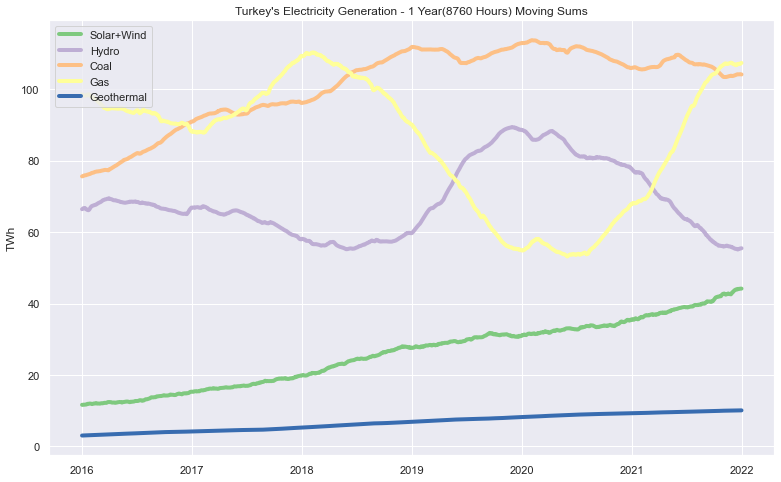

In [668]:
sns.set_theme( palette="Accent")

title("Turkey's Electricity Generation - 1 Year(8760 Hours) Moving Sums")
ylabel("TWh")
#plot(tr.gtotal.rolling(8760).sum()/1e6,label="Total",linewidth=4)
plot(tr.date, tr.renws.rolling(8760).sum()/1e6,label="Solar+Wind",linewidth=4)
plot(tr.date, tr.hydro.rolling(8760).sum()/1e6,label="Hydro",linewidth=4)
plot(tr.date, tr.coal.rolling(8760).sum()/1e6,label="Coal",linewidth=4)
plot(tr.date, tr.naturalGas.rolling(8760).sum()/1e6,label="Gas",linewidth=4)
plot(tr.date, tr.geothermal.rolling(8760).sum()/1e6,label="Geothermal",linewidth=4)


legend(loc="upper left")

In [429]:
(tr["gtotal"].rolling(8760).sum()/1e6).tail(1)

61366    326.097508
Name: gtotal, dtype: float64

In [433]:
trend=tr[((tr.day>30) & (tr.month>11) & (tr.hour==23))]

In [434]:
trend

date  fueloil  gasOil  blackCoal  lignite  geothermal  \
8759  2015-12-31 23:00:00    173.3     0.0     492.50  5158.55      483.91   
17542 2016-12-31 23:00:00    168.4     0.0     402.00  4522.32      605.77   
26302 2017-12-31 23:00:00    168.5     0.0     230.50  5239.37      802.94   
35062 2018-12-31 23:00:00    190.0     0.0     206.50  5442.84      952.62   
43822 2019-12-31 23:00:00     36.2     0.0     539.94  5815.61     1147.18   
52606 2020-12-31 23:00:00     32.9     0.0     608.24  5361.43     1248.68   
61366 2021-12-31 23:00:00     23.8     0.0     542.42  5894.31     1300.71   

       naturalGas    river  dammedHydro  lng  ...   renall      coal  \
8759      9234.63   586.97      3324.64  0.0  ...  4560.30  10955.08   
17542    10298.04  1270.37      3424.07  0.0  ...  5490.58  10472.64   
26302     7415.11  1823.43      5847.00  0.0  ...  8713.71  10833.48   
35062     6293.60  2279.74      3731.61  0.0  ...  7342.59  12539.33   
43822     6603.10  1683.21      4465.45  0.0  ...  7762.72  14009.43   
52606     8466.96   746.39      1574.92  0.0  ...  4183.02  13721.16   
61366     9920.89   829.37      3370.30  0.0  ...  6314.60  14499.60   

        coalgas    hydro    other  day  month  year  hour  \
8759   20189.71  3911.61   821.99   31     12  2015    23   
17542  20770.68  4694.44   964.54   31     12  2016    23   
26302  18248.59  7670.43  1186.31   31     12  2017    23   
35062  18832.93  6011.35  1521.15   31     12  2018    23   
43822  20612.53  6148.66  1650.26   31     12  2019    23   
52606  22188.12  2321.31  1892.91   31     12  2020    23   
61366  24420.49  4199.67  2138.54   31     12  2021    23   

                                                      ym  
8759   0        2015\n1        2015\n2        2015\n3...  
17542  0        2015\n1        2015\n2        2015\n3...  
26302  0        2015\n1        2015\n2        2015\n3...  
35062  0        2015\n1        2015\n2        2015\n3...  
43822  0        2015\n1        2015\n2        2015\n3...  
52606  0        2015\n1        2015\n2        2015\n3...  
61366  0        2015\n1        2015\n2        2015\n3...  

[7 rows x 39 columns]

In [445]:
trendyear=(tr[["gtotal","hydro","coal","naturalGas","wind","solar"]].rolling(8760).sum()/1e6).iloc[[17542,26302,35062,43822,52606,61366],:]

In [461]:
pd.options.display.float_format = '{:,.1f}'.format
trendyear["year"]=[2016,2017,2018,2019,2020,2021]
trendyear.set_index("year", inplace=True)
trendyear.columns=["Total Production","Hydro","Coal","Gas","Wind","Solar"]
trendyear

Total Production  Hydro  Coal   Gas  Wind  Solar
year                                                  
2016             268.7   66.8  90.9  88.2  15.3    0.0
2017             292.0   58.1  96.1 109.2  17.7    2.2
2018             299.2   59.7 111.8  90.1  19.8    7.8
2019             299.6   88.6 112.9  54.9  21.5    9.6
2020             300.8   77.7 106.0  68.0  24.4   11.2
2021             326.1   55.5 104.1 107.3  30.9   13.3

In [670]:
trendyear.diff(1).dropna()

Total Production  Hydro  Coal   Gas  Wind  Solar
year                                                  
2017              23.3   -8.7   5.2  21.0   2.4    2.2
2018               7.2    1.6  15.7 -19.1   2.0    5.6
2019               0.4   28.9   1.1 -35.2   1.8    1.8
2020               1.1  -10.9  -6.9  13.1   2.9    1.6
2021              25.3  -22.2  -1.8  39.4   6.5    2.1

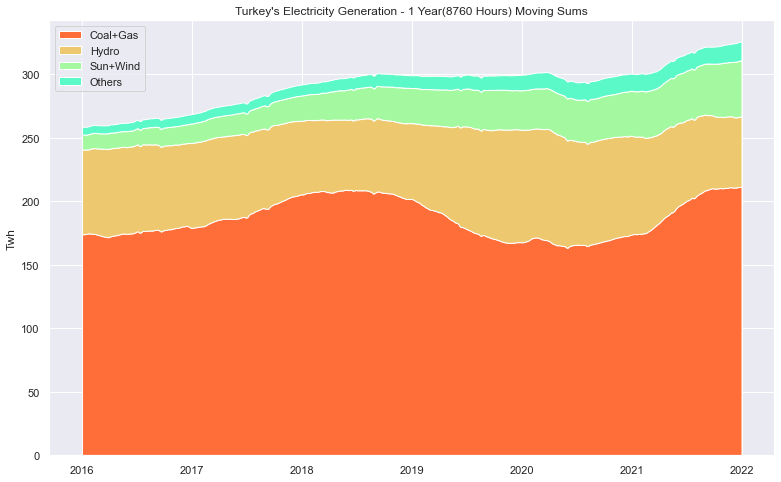

In [647]:
sns.set_theme( palette="rainbow_r")


title("Turkey's Electricity Generation - 1 Year(8760 Hours) Moving Sums")
ylabel("Twh")
plt.stackplot(tr.date,tr.coalgas.rolling(8760).sum()/1e6, 
              tr.hydro.rolling(8760).sum()/1e6, 
              tr.renws.rolling(8760).sum()/1e6,
              (tr.gtotal-tr.coalgas-tr.hydro-tr.renws).rolling(8760).sum()/1e6 
              , labels=["Coal+Gas","Hydro","Sun+Wind","Others"]
              #,colors=["darkgray","lightblue","orange","white"]
             )
legend(loc="upper left")

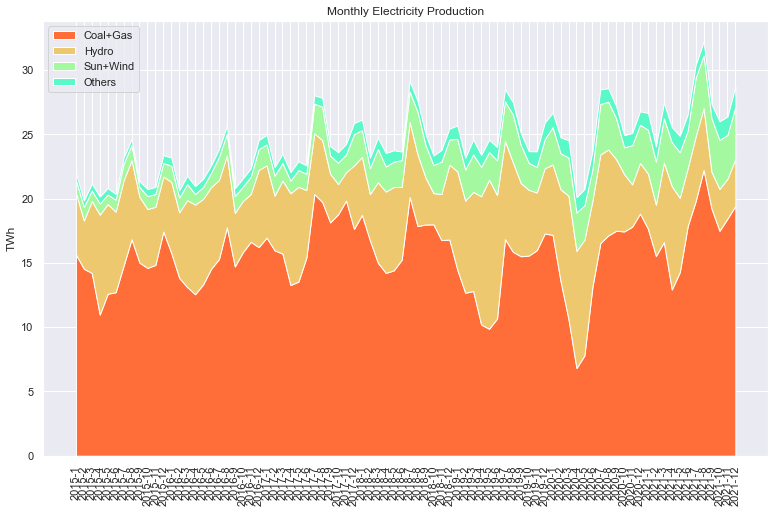

In [651]:
#sns.set_theme(style="darkgrid")
sns.set_theme(palette="rainbow_r")


title("Monthly Electricity Production")
ylabel("TWh")
plt.stackplot(trm.ym,trm.coalgas/1e6, trm.hydro/1e6, trm.renws/1e6, trm.other/1e6,
             labels=["Coal+Gas","Hydro","Sun+Wind","Others"]
              #, colors=["gray","blue","orange","gray"]
             )
xticks(rotation=90);
legend(loc="upper left")

In [245]:
trm.columns

Index(['year', 'month', 'fueloil', 'gasOil', 'blackCoal', 'lignite',
       'geothermal', 'naturalGas', 'river', 'dammedHydro', 'lng', 'biomass',
       'naphta', 'importCoal', 'asphaltiteCoal', 'wind', 'nucklear', 'sun',
       'importExport', 'total', 'ltotal', 'lwind', 'lbiogas', 'lcanalType',
       'lbiomass', 'lsun', 'lothers', 'gtotal', 'solar', 'renws', 'renall',
       'coal', 'coalgas', 'hydro', 'other', 'day', 'hour', 'ym'],
      dtype='object')

In [246]:
trmd=trm[["naturalGas","coal","coalgas","renws","renall","dammedHydro","river","solar","gtotal"]].diff(1)

In [247]:
trd=tr[["naturalGas","coal","coalgas","renws","renall","dammedHydro","river","solar","wind","gtotal"]].diff(1)

In [466]:
trmd[-12:].corr()

naturalGas  coal  coalgas  renws  renall  dammedHydro  river  \
naturalGas          1.0   0.2      0.8    0.0    -0.1          0.2   -0.5   
coal                0.2   1.0      0.7   -0.0    -0.2          0.1   -0.4   
coalgas             0.8   0.7      1.0    0.0    -0.2          0.2   -0.6   
renws               0.0  -0.0      0.0    1.0     0.3          0.2    0.1   
renall             -0.1  -0.2     -0.2    0.3     1.0          0.9    0.8   
dammedHydro         0.2   0.1      0.2    0.2     0.9          1.0    0.6   
river              -0.5  -0.4     -0.6    0.1     0.8          0.6    1.0   
solar               0.2  -0.4     -0.1    0.3     0.1         -0.0   -0.0   
gtotal              0.7   0.5      0.8    0.3     0.4          0.7   -0.1   

             solar  gtotal  
naturalGas     0.2     0.7  
coal          -0.4     0.5  
coalgas       -0.1     0.8  
renws          0.3     0.3  
renall         0.1     0.4  
dammedHydro   -0.0     0.7  
river         -0.0    -0.1  
solar          1.0    -0.0  
gtotal        -0.0     1.0

In [467]:
trmd.corr()

naturalGas  coal  coalgas  renws  renall  dammedHydro  river  \
naturalGas          1.0   0.4      0.9    0.1    -0.3         -0.1   -0.5   
coal                0.4   1.0      0.8    0.2    -0.3         -0.1   -0.5   
coalgas             0.9   0.8      1.0    0.2    -0.4         -0.1   -0.6   
renws               0.1   0.2      0.2    1.0     0.2          0.3   -0.1   
renall             -0.3  -0.3     -0.4    0.2     1.0          0.9    0.7   
dammedHydro        -0.1  -0.1     -0.1    0.3     0.9          1.0    0.4   
river              -0.5  -0.5     -0.6   -0.1     0.7          0.4    1.0   
solar               0.0  -0.1     -0.0    0.2     0.2          0.1    0.0   
gtotal              0.7   0.6      0.8    0.5     0.3          0.5   -0.2   

             solar  gtotal  
naturalGas     0.0     0.7  
coal          -0.1     0.6  
coalgas       -0.0     0.8  
renws          0.2     0.5  
renall         0.2     0.3  
dammedHydro    0.1     0.5  
river          0.0    -0.2  
solar          1.0     0.0  
gtotal         0.0     1.0

In [468]:
trd[-8760:].corr()

naturalGas  coal  coalgas  renws  renall  dammedHydro  river  \
naturalGas          1.0   0.3      0.9    0.0     0.3          0.3    0.3   
coal                0.3   1.0      0.7    0.1     0.2          0.2    0.2   
coalgas             0.9   0.7      1.0    0.0     0.3          0.3    0.4   
renws               0.0   0.1      0.0    1.0     0.7          0.2    0.1   
renall              0.3   0.2      0.3    0.7     1.0          0.9    0.5   
dammedHydro         0.3   0.2      0.3    0.2     0.9          1.0    0.6   
river               0.3   0.2      0.4    0.1     0.5          0.6    1.0   
solar               0.0   0.1      0.1    0.9     0.7          0.2    0.0   
wind               -0.1  -0.0     -0.1    0.0    -0.2         -0.0    0.0   
gtotal              0.6   0.5      0.7    0.5     0.9          0.8    0.6   

             solar  wind  gtotal  
naturalGas     0.0  -0.1     0.6  
coal           0.1  -0.0     0.5  
coalgas        0.1  -0.1     0.7  
renws          0.9   0.0     0.5  
renall         0.7  -0.2     0.9  
dammedHydro    0.2  -0.0     0.8  
river          0.0   0.0     0.6  
solar          1.0  -0.3     0.5  
wind          -0.3   1.0    -0.0  
gtotal         0.5  -0.0     1.0

In [476]:
trd.corr()

naturalGas  coal  coalgas  renws  renall  dammedHydro  river  \
naturalGas          1.0   0.3      0.9    0.1     0.4          0.4    0.4   
coal                0.3   1.0      0.6    0.0     0.2          0.2    0.3   
coalgas             0.9   0.6      1.0    0.1     0.4          0.4    0.4   
renws               0.1   0.0      0.1    1.0     0.5          0.2    0.1   
renall              0.4   0.2      0.4    0.5     1.0          0.9    0.5   
dammedHydro         0.4   0.2      0.4    0.2     0.9          1.0    0.5   
river               0.4   0.3      0.4    0.1     0.5          0.5    1.0   
solar               0.1   0.0      0.1    0.9     0.6          0.2    0.1   
wind               -0.1  -0.0     -0.1    0.1    -0.1         -0.0    0.0   
gtotal              0.7   0.4      0.8    0.4     0.9          0.8    0.6   

             solar  wind  gtotal  
naturalGas     0.1  -0.1     0.7  
coal           0.0  -0.0     0.4  
coalgas        0.1  -0.1     0.8  
renws          0.9   0.1     0.4  
renall         0.6  -0.1     0.9  
dammedHydro    0.2  -0.0     0.8  
river          0.1   0.0     0.6  
solar          1.0  -0.2     0.4  
wind          -0.2   1.0    -0.0  
gtotal         0.4  -0.0     1.0

In [482]:
y=5
tr[["naturalGas","coal","coalgas","renws","renall","dammedHydro","river","solar","wind","gtotal"]][-8760*y:].corr()

naturalGas  coal  coalgas  renws  renall  dammedHydro  river  \
naturalGas          1.0   0.2      0.9   -0.0    -0.2         -0.1   -0.5   
coal                0.2   1.0      0.6    0.2    -0.1         -0.0   -0.5   
coalgas             0.9   0.6      1.0    0.0    -0.2         -0.1   -0.6   
renws              -0.0   0.2      0.0    1.0     0.3          0.1   -0.1   
renall             -0.2  -0.1     -0.2    0.3     1.0          0.9    0.6   
dammedHydro        -0.1  -0.0     -0.1    0.1     0.9          1.0    0.4   
river              -0.5  -0.5     -0.6   -0.1     0.6          0.4    1.0   
solar               0.0   0.1      0.1    0.7     0.5          0.2    0.0   
wind               -0.1   0.1      0.0    0.7    -0.0         -0.1   -0.1   
gtotal              0.6   0.5      0.7    0.5     0.5          0.5   -0.1   

             solar  wind  gtotal  
naturalGas     0.0  -0.1     0.6  
coal           0.1   0.1     0.5  
coalgas        0.1   0.0     0.7  
renws          0.7   0.7     0.5  
renall         0.5  -0.0     0.5  
dammedHydro    0.2  -0.1     0.5  
river          0.0  -0.1    -0.1  
solar          1.0   0.0     0.4  
wind           0.0   1.0     0.2  
gtotal         0.4   0.2     1.0

In [484]:
y=1
tr[["naturalGas","coal","coalgas","renws","renall","dammedHydro","river","solar","wind","gtotal"]][-8760*y:].corr()

naturalGas  coal  coalgas  renws  renall  dammedHydro  river  \
naturalGas          1.0   0.3      0.9   -0.1     0.0          0.1   -0.4   
coal                0.3   1.0      0.6    0.0    -0.1          0.0   -0.4   
coalgas             0.9   0.6      1.0   -0.1    -0.0          0.1   -0.5   
renws              -0.1   0.0     -0.1    1.0     0.3          0.0   -0.0   
renall              0.0  -0.1     -0.0    0.3     1.0          0.9    0.6   
dammedHydro         0.1   0.0      0.1    0.0     0.9          1.0    0.5   
river              -0.4  -0.4     -0.5   -0.0     0.6          0.5    1.0   
solar               0.1  -0.1      0.0    0.7     0.6          0.2    0.0   
wind               -0.2   0.1     -0.1    0.6    -0.2         -0.2   -0.1   
gtotal              0.6   0.4      0.7    0.4     0.6          0.7   -0.0   

             solar  wind  gtotal  
naturalGas     0.1  -0.2     0.6  
coal          -0.1   0.1     0.4  
coalgas        0.0  -0.1     0.7  
renws          0.7   0.6     0.4  
renall         0.6  -0.2     0.6  
dammedHydro    0.2  -0.2     0.7  
river          0.0  -0.1    -0.0  
solar          1.0  -0.1     0.4  
wind          -0.1   1.0     0.1  
gtotal         0.4   0.1     1.0

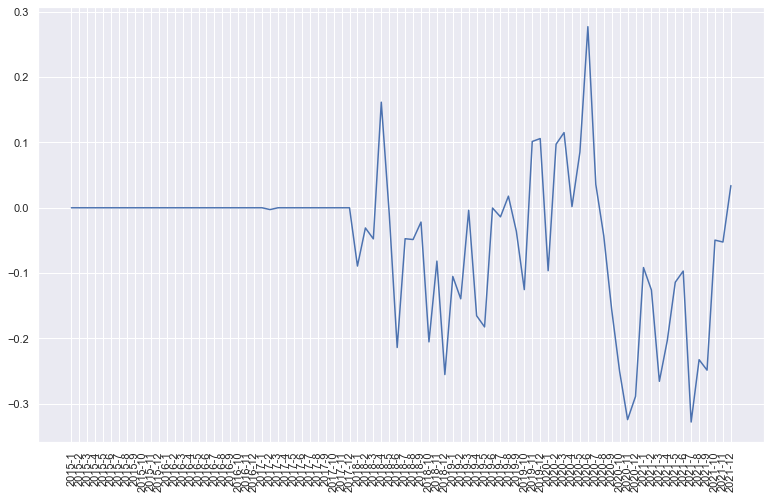

In [249]:
xticks(rotation=90)
plot(trm.ym,trm.importExport/1e6)

Text(0, 0.5, 'TWh')

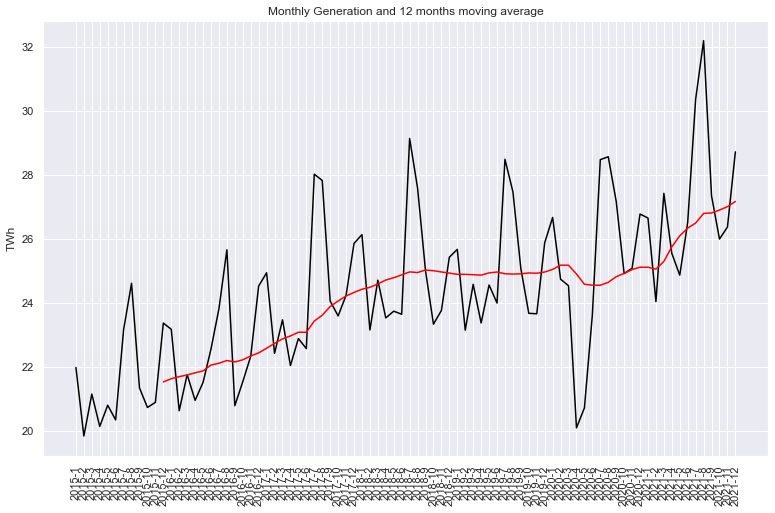

In [637]:
plot(trm.ym,trm.gtotal/1e6,label="Generation",color="black")
plot(trm.ym,(trm.gtotal/1e6).rolling(12).sum()/12,label="Moving Average",color="red")
xticks(rotation=90);
title("Monthly Generation and 12 months moving average")
ylabel("TWh")

In [258]:
trm["shydro"]=100*trm["hydro"]/trm["gtotal"]
trm["scoal"]=100*trm["coal"]/trm["gtotal"]
trm["sgas"]=100*trm["naturalGas"]/trm["gtotal"]

In [259]:
trm.columns

Index(['year', 'month', 'fueloil', 'gasOil', 'blackCoal', 'lignite',
       'geothermal', 'naturalGas', 'river', 'dammedHydro', 'lng', 'biomass',
       'naphta', 'importCoal', 'asphaltiteCoal', 'wind', 'nucklear', 'sun',
       'importExport', 'total', 'ltotal', 'lwind', 'lbiogas', 'lcanalType',
       'lbiomass', 'lsun', 'lothers', 'gtotal', 'solar', 'renws', 'renall',
       'coal', 'coalgas', 'hydro', 'other', 'day', 'hour', 'ym', 'shydro',
       'scoal', 'sgas', 'sgeo', 'ssolar', 'swind'],
      dtype='object')

In [310]:
trm["sgeo"]=100*trm["geothermal"]/trm["gtotal"]
trm["ssolar"]=100*trm["solar"]/trm["gtotal"]
trm["swind"]=100*trm["wind"]/trm["gtotal"]
trm["sren"]=100*trm["renall"]/trm["gtotal"]

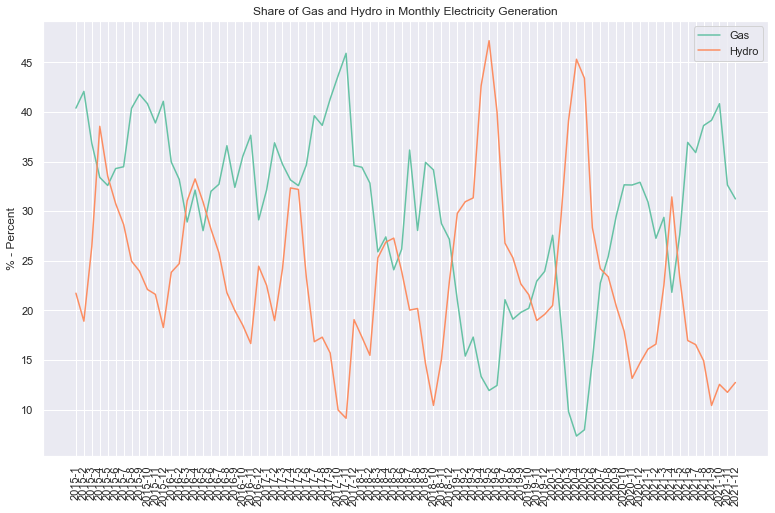

In [485]:
#plot(trm.ym,trm.scoal)
plot(trm.ym,trm.sgas,label="Gas")
plot(trm.ym,trm.shydro,label="Hydro")
xticks(rotation=90);
ylabel("% - Percent")
title("Share of Gas and Hydro in Monthly Electricity Generation")

legend()

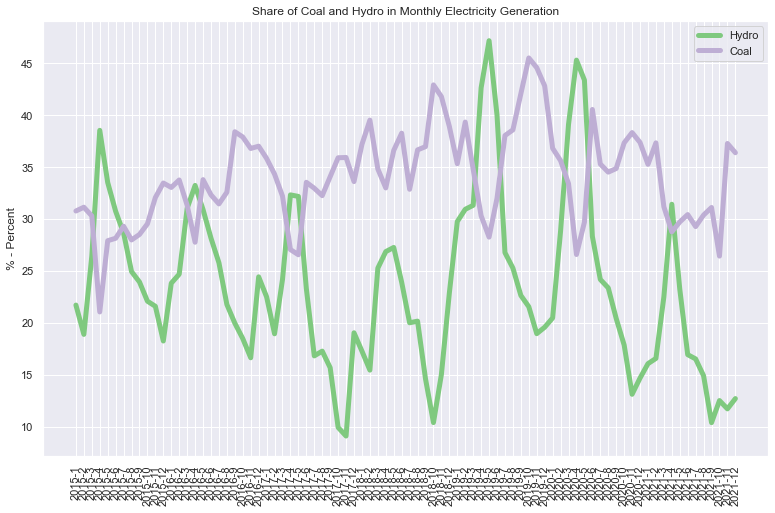

In [702]:
#plot(trm.ym,trm.scoal)
plot(trm.ym,trm.shydro,label="Hydro",linewidth=5)
plot(trm.ym,trm.scoal,label="Coal",linewidth=5)
xticks(rotation=90);
ylabel("% - Percent")
title("Share of Coal and Hydro in Monthly Electricity Generation")
legend()

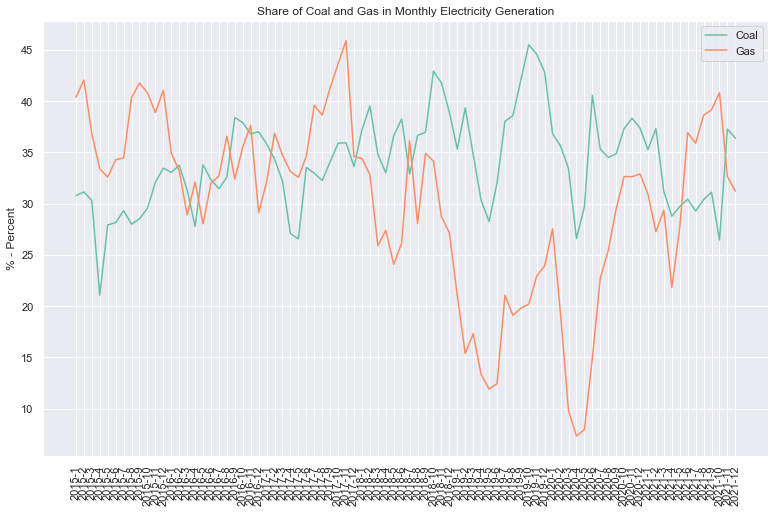

In [488]:
#plot(trm.ym,trm.scoal)
plot(trm.ym,trm.scoal,label="Coal")
plot(trm.ym,trm.sgas,label="Gas")
xticks(rotation=90);
ylabel("% - Percent")
title("Share of Coal and Gas in Monthly Electricity Generation")
legend()

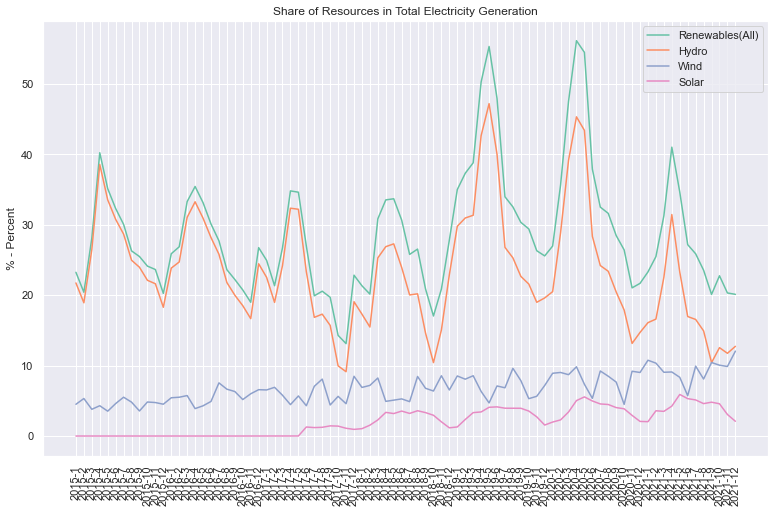

In [422]:
#plot(trm.ym,trm.scoal)
sns.set_theme(style="darkgrid", palette="Set2")


plot(trm.ym,trm.sren,label="Renewables(All)")
plot(trm.ym,trm.shydro,label="Hydro")
plot(trm.ym,trm.swind,label="Wind")
plot(trm.ym,trm.ssolar,label="Solar")
ylabel("% - Percent")
xticks(rotation=90);
title("Share of Resources in Total Electricity Generation")
legend()

In [286]:
lastyears=3
tr5=tr[-8760*lastyears:]
tr5.describe().iloc[2,:]/tr5.describe().iloc[1,:]

fueloil            0.880077
gasOil            75.134840
blackCoal          0.264784
lignite            0.143210
geothermal         0.131139
naturalGas         0.483881
river              0.621929
dammedHydro        0.504686
lng                     NaN
biomass            0.275082
naphta                  NaN
importCoal         0.263871
asphaltiteCoal     0.285199
wind               0.588517
nucklear                NaN
sun                1.902858
importExport      -2.419611
total              0.155294
ltotal             1.311873
lwind              0.690168
lbiogas            0.111265
lcanalType         0.381997
lbiomass           0.118544
lsun               1.363647
lothers            2.102874
gtotal             0.163405
solar              1.367251
renws              0.555388
renall             0.402168
coal               0.177186
coalgas            0.255086
hydro              0.477617
other              0.199228
day                0.558505
month              0.528055
year               0

In [283]:
tr5.describe()

fueloil        gasOil     blackCoal       lignite    geothermal  \
count  43800.000000  43800.000000  43800.000000  43800.000000  43800.000000   
mean     102.704223      0.001788    375.802906   4844.040342    909.368133   
std       68.275999      0.173473    112.752942    627.950862    219.566198   
min        0.000000      0.000000     61.500000   2189.100000    373.040000   
25%       36.600000      0.000000    315.500000   4495.490000    749.955000   
50%       68.000000      0.000000    356.500000   4873.230000    926.070000   
75%      172.500000      0.000000    443.582500   5259.720000   1100.850000   
max      237.600000     20.500000    692.620000   6984.150000   1314.850000   

         naturalGas         river   dammedHydro           lng       biomass  \
count  43800.000000  43800.000000  43800.000000  43800.000000  43800.000000   
mean    9802.882345   2150.107607   5603.767678      0.072421    394.687901   
std     4118.770461   1292.673180   2958.405893      0.326257    167.139498   
min      496.660000    343.390000    168.610000      0.000000    141.440000   
25%     6926.612500   1122.422500   3215.417500      0.000000    248.837500   
50%    10040.825000   1664.465000   5374.055000      0.000000    359.685000   
75%    12706.132500   3061.637500   7768.902500      0.000000    480.262500   
max    19453.650000   6084.530000  15891.780000      2.170000    830.750000   

       ...         renws        renall          coal       coalgas  \
count  ...  43800.000000  43800.000000  43800.000000  43800.000000   
mean   ...   3615.940789  10100.665347  12121.696885  21924.651651   
std    ...   2186.539458   4347.571872   1996.623788   5013.101094   
min    ...     49.650000   1615.340000   3633.000000   4396.670000   
25%    ...   1853.940000   6686.987500  10977.197500  19032.240000   
50%    ...   3311.120000   9810.830000  12451.990000  22619.345000   
75%    ...   4966.717500  13024.305000  13616.745000  25313.085000   
max    ...  13237.250000  23428.760000  15976.200000  33400.730000   

              hydro         other           day         month          year  \
count  43800.000000  43800.000000  43800.000000  43800.000000  43800.000000   
mean    7753.875284   1358.777083     15.735890      6.526575   2019.001644   
std     3730.124532    360.511320      8.795077      3.447092      1.413647   
min      594.350000  -1916.180000      1.000000      1.000000   2017.000000   
25%     4818.815000   1068.560000      8.000000      4.000000   2018.000000   
50%     7561.180000   1310.570000     16.000000      7.000000   2019.000000   
75%    10364.902500   1616.202500     23.000000     10.000000   2020.000000   
max    19018.810000   3645.150000     31.000000     12.000000   2021.000000   

               hour  
count  43800.000000  
mean      11.500000  
std        6.922266  
min        0.000000  
25%        5.750000  
50%       11.500000  
75%       17.250000  
max       23.000000  

[8 rows x 37 columns]

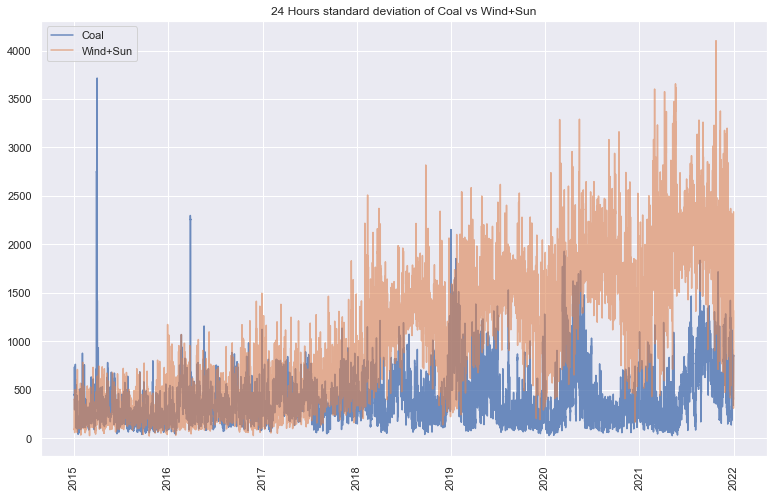

In [303]:
title("24 Hours standard deviation of Coal vs Wind+Sun")
plot(tr.date,tr.coal.rolling(24).std(),alpha=0.8, label="Coal")
plot(tr.date,tr.renws.rolling(24).std(),alpha=0.6, label="Wind+Sun")
xticks(rotation=90);
legend()

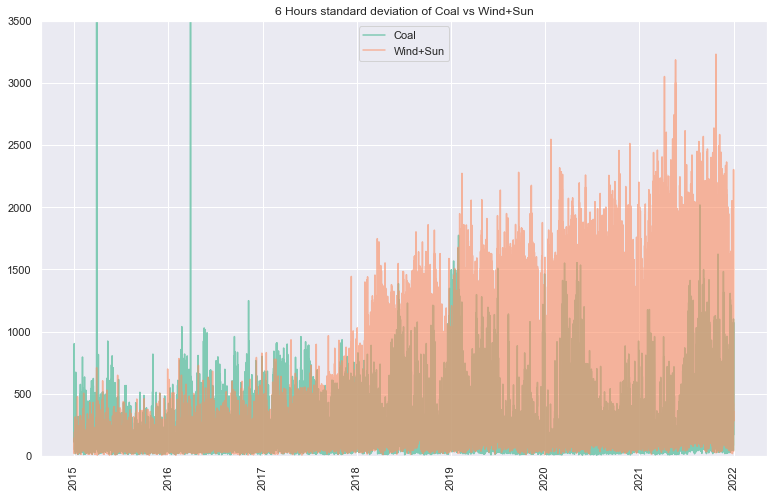

In [494]:
title("6 Hours standard deviation of Coal vs Wind+Sun")
plot(tr.date,tr.coal.rolling(6).std(),alpha=0.8, label="Coal")
plot(tr.date,tr.renws.rolling(6).std(),alpha=0.6, label="Wind+Sun")
ylim(0,3500)
xticks(rotation=90);
legend()

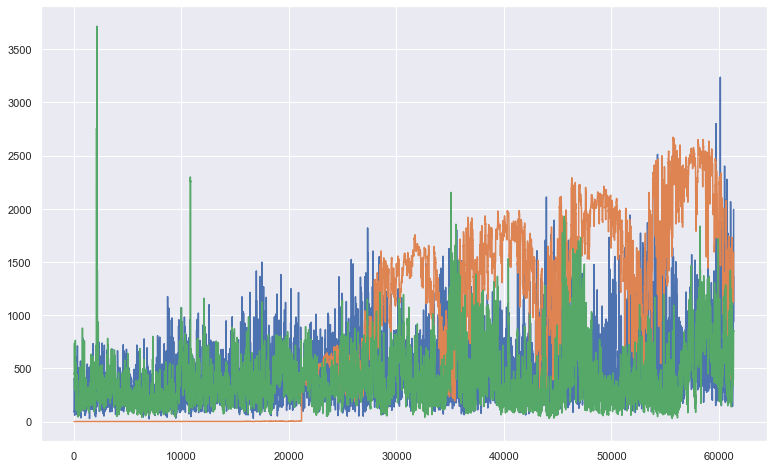

In [290]:
plot(tr.wind.rolling(24).std())
plot(tr.solar.rolling(24).std())

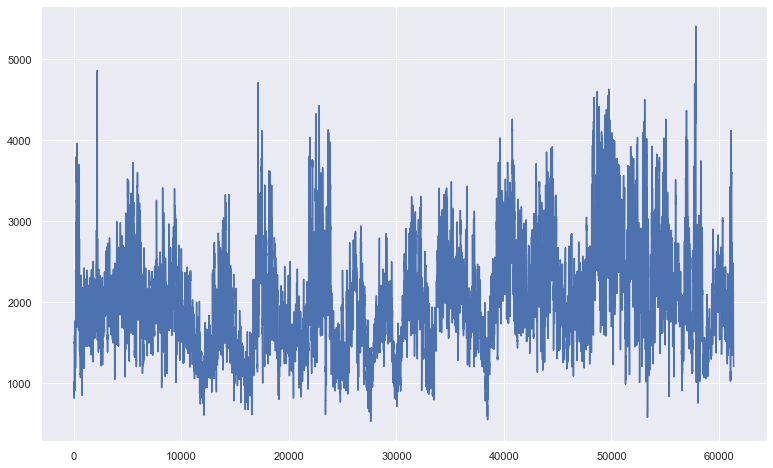

In [293]:
plot(tr.hydro.rolling(24).std())

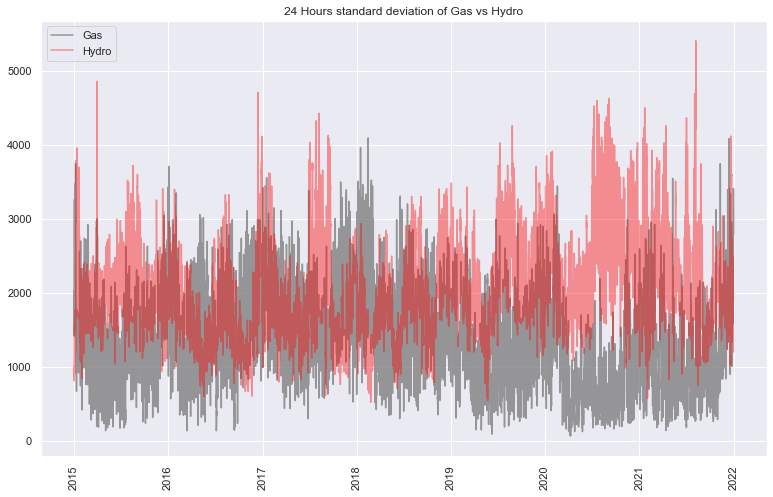

In [708]:
title("24 Hours standard deviation of Gas vs Hydro")
plot(tr.date,tr.naturalGas.rolling(24).std(),alpha=0.8, label="Gas", color="gray")
plot(tr.date,tr.hydro.rolling(24).std(),alpha=0.4, label="Hydro",color="red")
xticks(rotation=90);
legend()

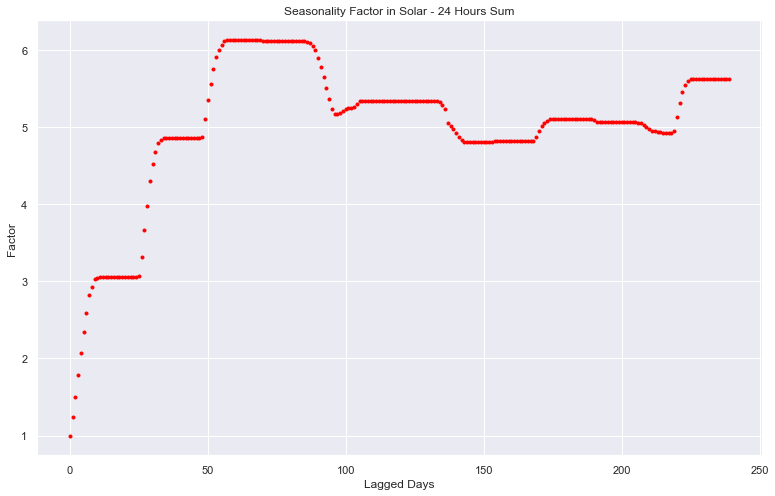

In [703]:
title("Seasonality Factor in Solar - 24 Hours Sum")
backyear=3
ylabel("Factor")
xlabel("Lagged Days")
for i in range(0,8*30):
 max_val=((tr[-8760*backyear:].solar.rolling(24).sum()/1e6)/(tr[-8760*backyear:].solar.rolling(24).sum().shift(i)/1e6)).dropna().max()
 plot([i], [max_val], marker='o', markersize=3, color="red")


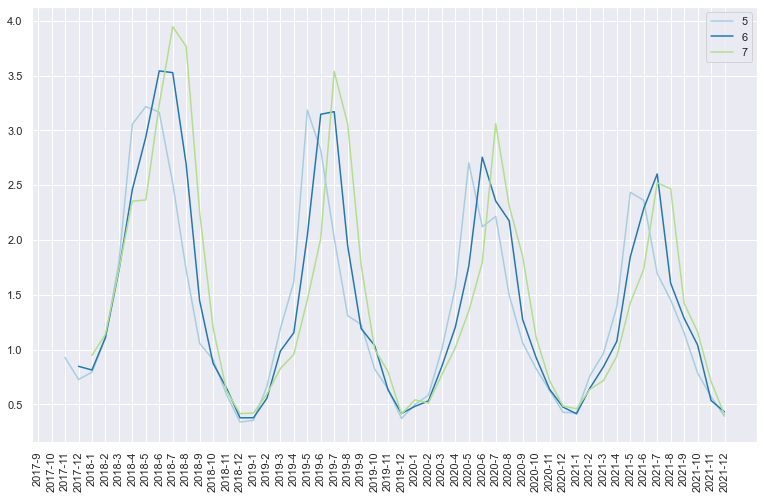

In [373]:
xticks(rotation=90)
for i in range(5,8):
 plot(trm.ym,(trm.ltotal/1e6)/(trm.ltotal.shift(i)/1e6),label=str(i))
legend()

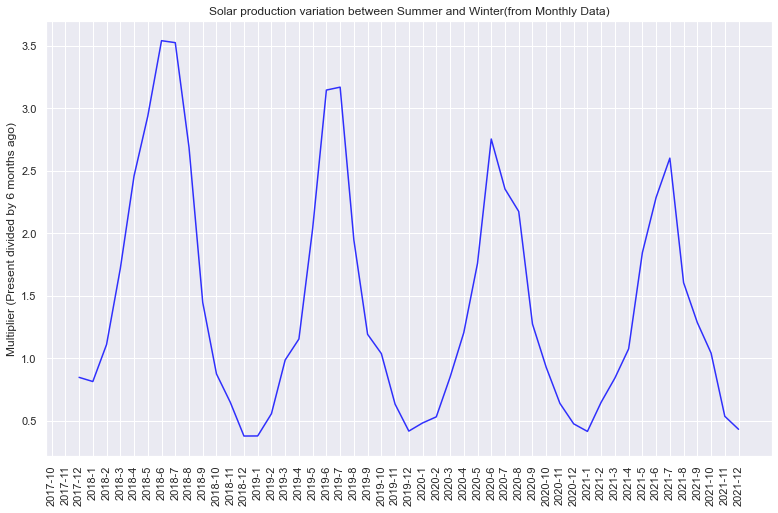

In [499]:
title("Solar production variation between Summer and Winter(from Monthly Data)")
xticks(rotation=90)
ylabel("Multiplier (Present divided by 6 months ago)")
plot(trm.ym,(trm.ltotal/1e6)/(trm.ltotal.shift(6)/1e6),label=str(i),color="blue",alpha=0.8)

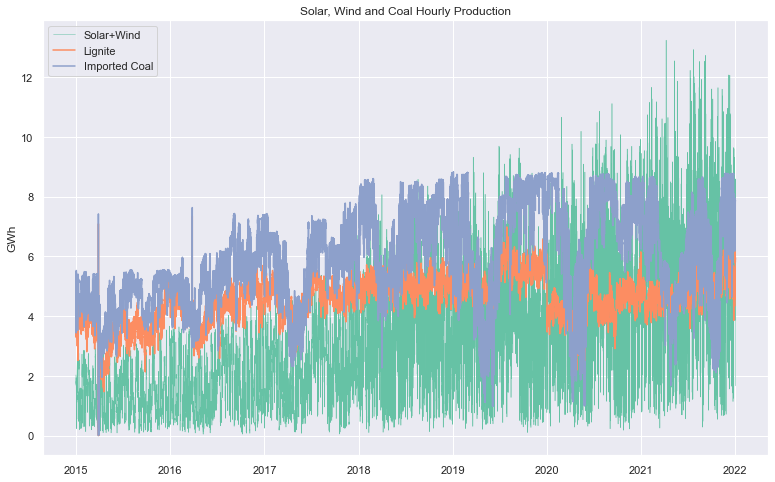

In [506]:
title("Solar, Wind and Coal Hourly Production")
ylabel("GWh")
plot(tr.date,tr.renws/1000,label="Solar+Wind",linewidth=0.5)
plot(tr.date,tr.lignite/1000, label = "Lignite")
plot(tr.date,tr.importCoal/1000, label= "Imported Coal")
legend()

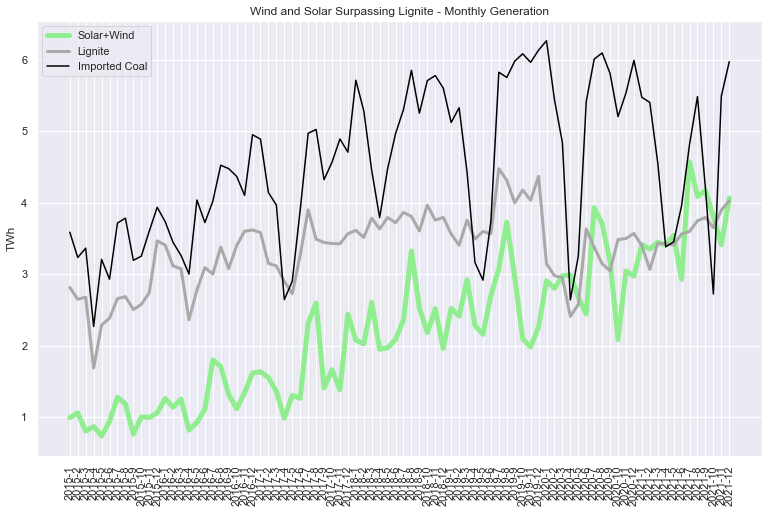

In [508]:
title("Wind and Solar Surpassing Lignite - Monthly Generation")
xticks(rotation=90)
ylabel("TWh")
plot(trm.ym,trm.renws/1e6,label="Solar+Wind", linewidth=5, color="lightgreen")
plot(trm.ym,trm.lignite/1e6, label = "Lignite",linewidth=3,color="darkgray")
plot(trm.ym,trm.importCoal/1e6, label= "Imported Coal",color="black")
legend()

In [403]:
tr[["coalgas","coal","wind","solar","geothermal","hydro"]][-8760:].describe().loc[["mean","std"],:]

coalgas          coal         wind        solar   geothermal  \
mean  24138.748803  11885.318662  3527.486322  1515.418288  1153.594933   
std    4277.441892   1801.032228  1909.684579  2031.617729   110.814241   

            hydro  
mean  6332.570241  
std   3310.249462

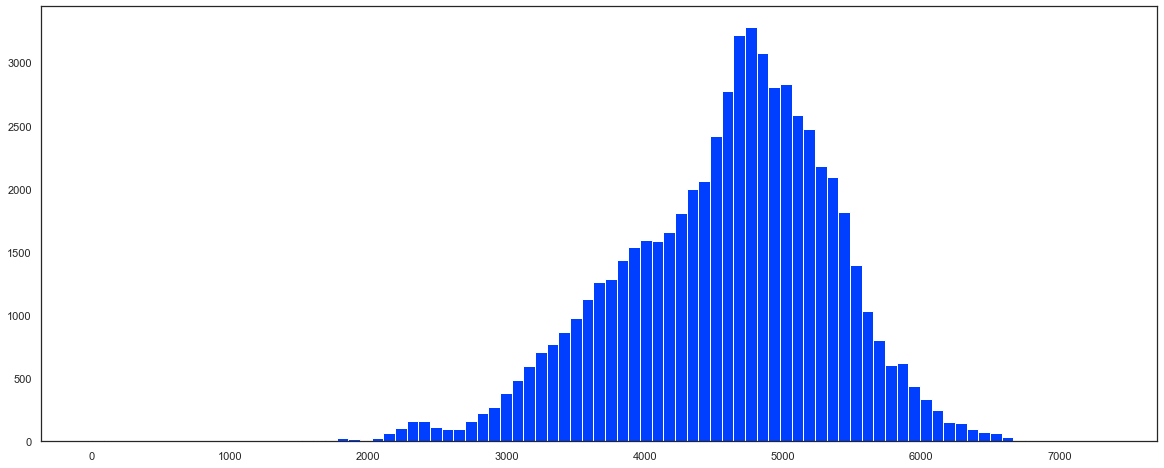

In [154]:
hist(tr[["lignite"]], bins=87, );

In [ ]:
sns.set_style("darkgrid")

plt.legend()

In [291]:
tr.columns

Index(['date', 'fueloil', 'gasOil', 'blackCoal', 'lignite', 'geothermal',
       'naturalGas', 'river', 'dammedHydro', 'lng', 'biomass', 'naphta',
       'importCoal', 'asphaltiteCoal', 'wind', 'nucklear', 'sun',
       'importExport', 'total', 'ltotal', 'lwind', 'lbiogas', 'lcanalType',
       'lbiomass', 'lsun', 'lothers', 'day', 'month', 'year', 'hour', 'ym'],
      dtype='object')

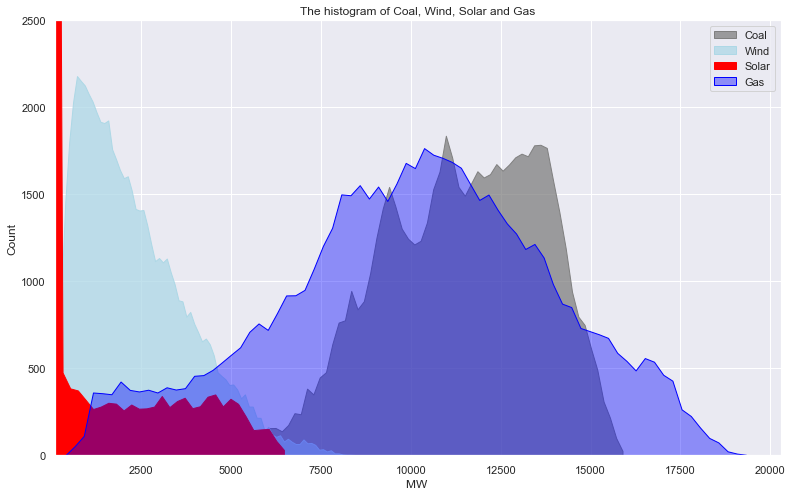

In [419]:
sns.color_palette("tab10")

#ax = sns.distplot(x, rug=True, hist=False)
#g=sns.histplot(tr.lignite,element="poly",color="black",label="Lignite");
g=sns.histplot(tr.coal,element="poly", color="gray",label="Coal");
g=sns.histplot(tr.wind,element="poly",color="lightblue",label="Wind");
g=sns.histplot(tr.solar[-8750*2:],element="poly", color="red",label="Solar",alpha=1);
g=sns.histplot(tr.naturalGas,element="poly", color="blue",label="Gas",alpha=0.4);
#g=sns.histplot(tr.hydro,element="poly", color="green",label="Hydro",alpha=0.5);



#sns.kdeplot(data=tr,x="importCoal");
#sns.kdeplot(data=tr,x="wind");
#sns.kdeplot(data=tr,x="lsun");
#sns.kdeplot(data=tr,x="sun");
g.set(xlim=(100, None))
g.set(ylim=(0, 2500))
g.set(xlabel="MW ")
g.set(title="The histogram of Coal, Wind, Solar and Gas")
g.legend()

[Text(0.5, 0, 'MW'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Big Hydro Variation - Histogram')]

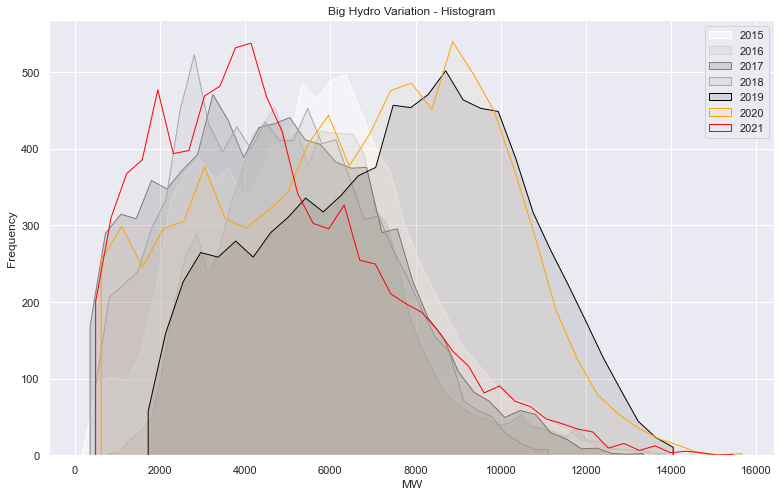

In [516]:
color=["white","lightgray","gray","darkgray","black","orange","red"]
for i in range(2015,2022):
    g=sns.histplot(tr.dammedHydro[tr.year==i],element="poly", alpha=(((2022-i)**2) /100)
            , kde=False, color=color[(i-2015)], label=str(i));

g.legend()    
g.set(xlabel="MW",ylabel="Frequency",title="Big Hydro Variation - Histogram")

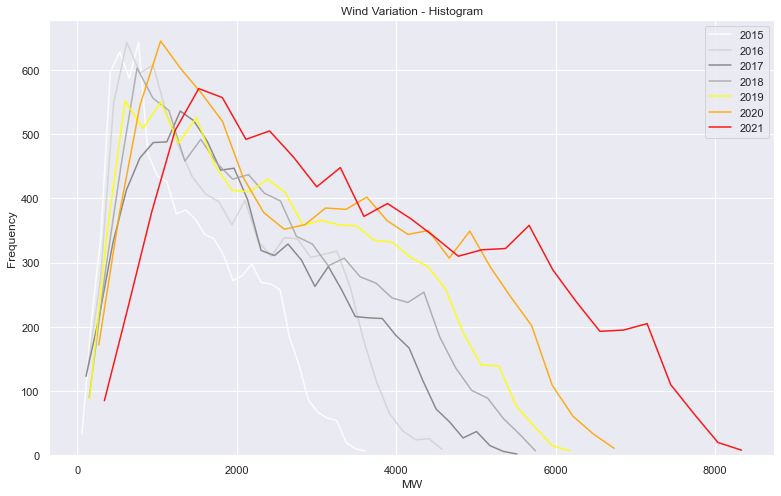

In [519]:
color=["white","lightgray","gray","darkgray","yellow","orange","red"]
for i in range(2015,2022):
    g=sns.histplot(tr.wind[tr.year==i],element="poly", alpha=0.9, fill=False
            , kde=False, color=color[(i-2015)], label=str(i));
g.set(xlabel="MW",ylabel="Frequency",title="Wind Variation - Histogram")
g.legend() 

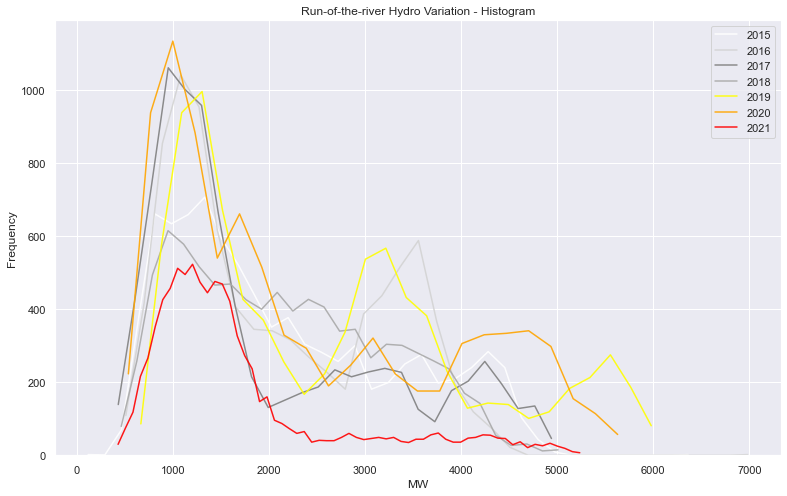

In [704]:
color=["white","lightgray","gray","darkgray","yellow","orange","red"]
for i in range(2015,2022):
    g=sns.histplot(tr.river[tr.year==i],element="poly", alpha=0.9, fill=False
            , kde=False, color=color[(i-2015)], label=str(i));
g.set(xlabel="MW",ylabel="Frequency",title="Run-of-the-river Hydro Variation - Histogram")
g.legend() 

[Text(0.5, 0, 'MW')]

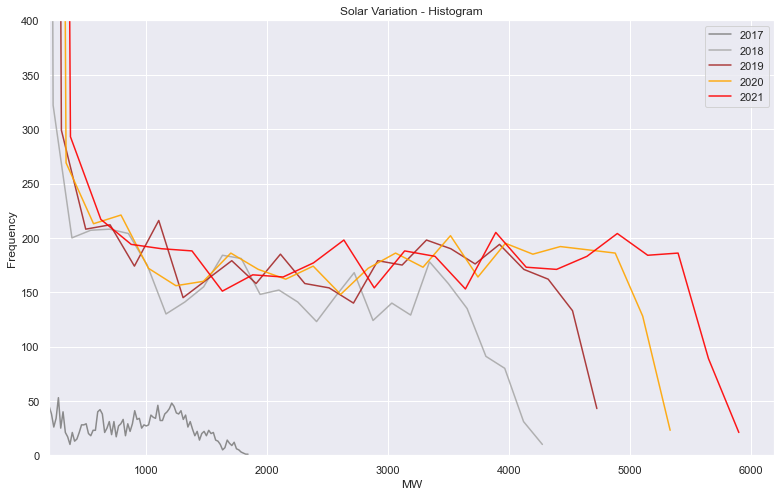

In [522]:
color=["white","lightgray","gray","darkgray","brown","orange","red"]
for i in range(2017,2022):
    g=sns.histplot(tr.lsun[tr.year==i],element="poly", alpha=0.9, fill=False
            , kde=False, color=color[(i-2015)], label=str(i));

g.legend() 
g.set(xlim=(200, None))
g.set(ylim=(0, 400))

g.set(xlabel="MW",ylabel="Frequency",title="Solar Variation - Histogram")
g.set(xlabel="MW")




[(0.0, 1200.0)]

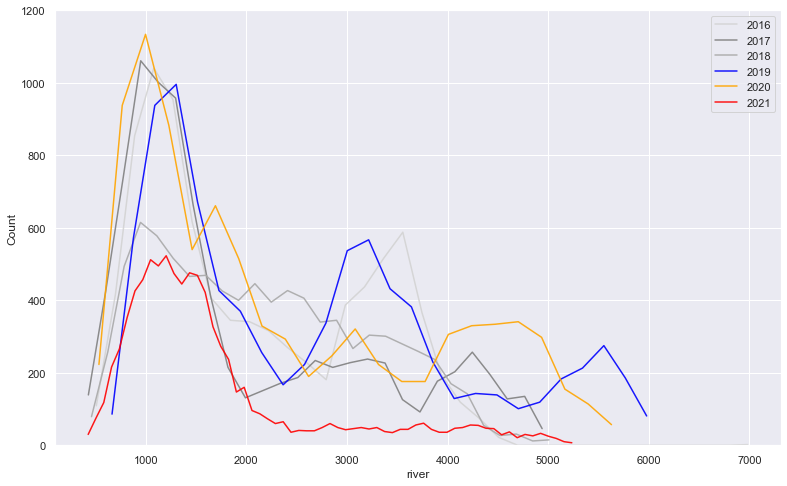

In [262]:
color=["white","lightgray","gray","darkgray","blue","orange","red"]
for i in range(2016,2022):
    g=sns.histplot(tr.river[tr.year==i],element="poly", alpha=0.9, fill=False
            , kde=False, color=color[(i-2015)], label=str(i));

g.legend() 
g.set(ylim=(0, 1200))

[(0.0, 1200.0)]

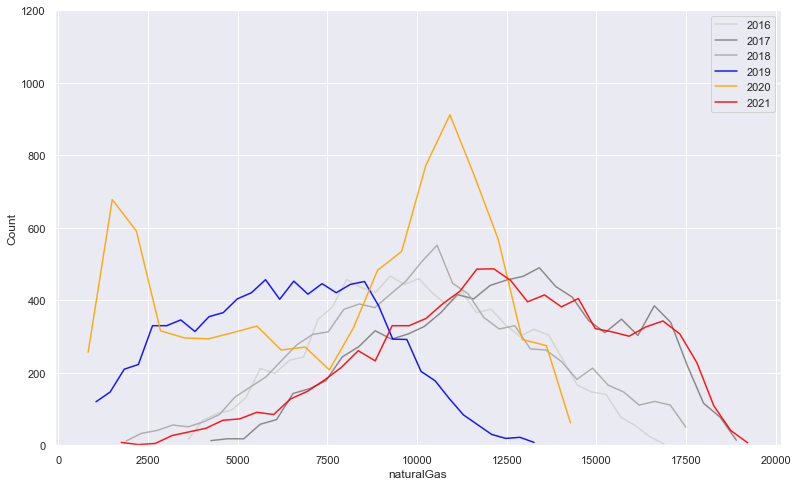

In [713]:
a=["white","lightgray","gray","darkgray","blue","orange","red"]
for i in range(2016,2022):
    g=sns.histplot(tr.naturalGas[tr.year==i],element="poly", alpha=0.9, fill=False
            , kde=False, color=a[(i-2015)], label=str(i));

g.legend() 
g.set(ylim=(0, 1200))

[(0.0, 550.0)]

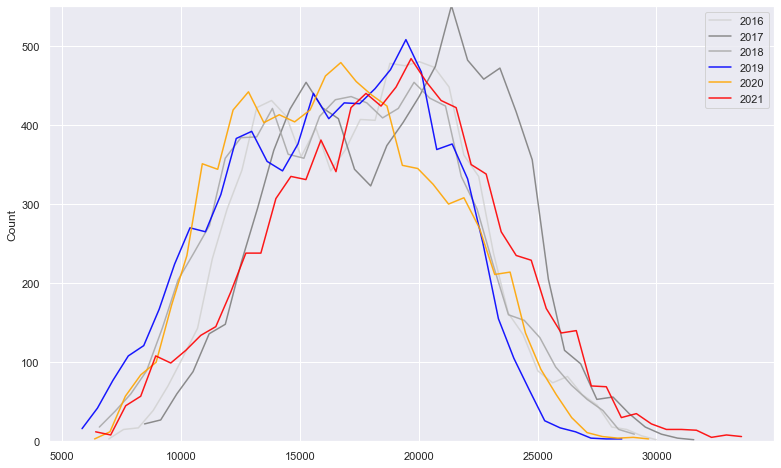

In [268]:
tr.color=["white","lightgray","gray","darkgray","blue","orange","red"]
for i in range(2016,2022):
    g=sns.histplot((tr.naturalGas[tr.year==i]+tr.dammedHydro[tr.year==i]+tr.river[tr.year==i]),element="poly", alpha=0.9, fill=False
            , kde=False, color=color[(i-2015)], label=str(i));

g.legend() 
g.set(ylim=(0, 550))

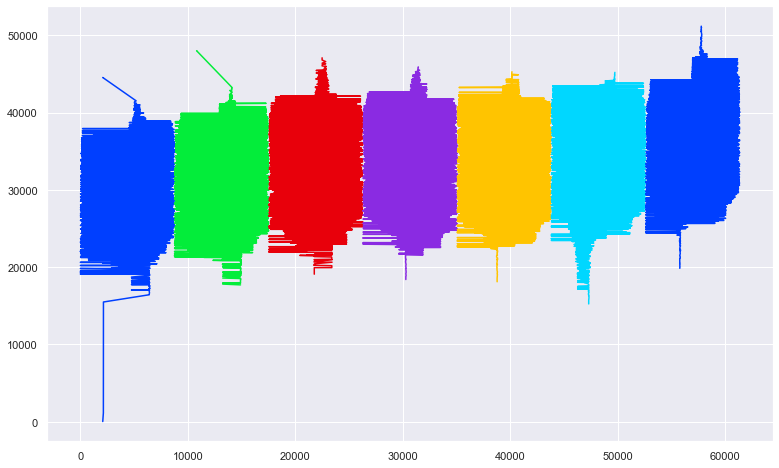

In [300]:
for i in range(2015,2022):
    plot(tr.total[tr.year==i].sort_values())

<AxesSubplot:xlabel='lignite'>

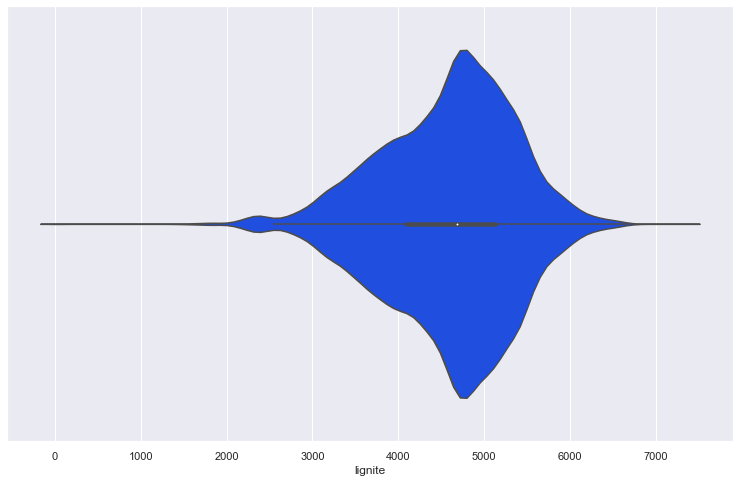

In [301]:
sns.violinplot(x=tr["lignite"])


Text(0.5, 1.0, 'The Generation Pattern of Various Resources')

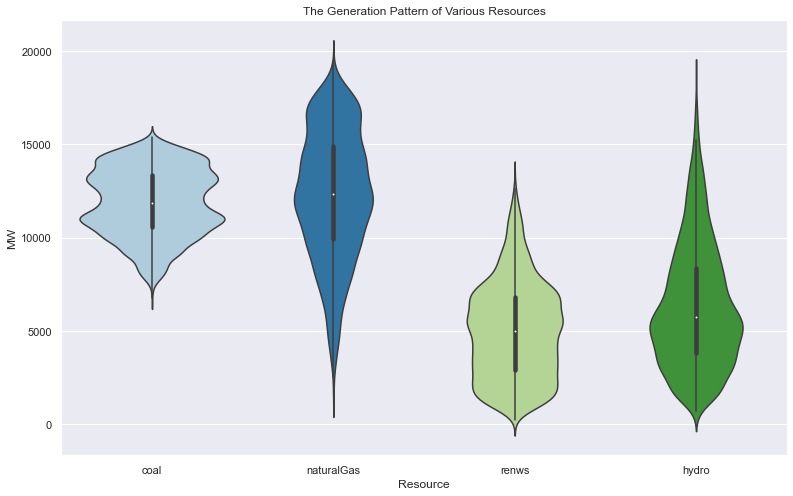

In [537]:
trx=tr[tr.year>2020]
cols=["coal","naturalGas","renws","hydro"]
sns.violinplot(data=(trx[cols]))
xlabel("Resource")
ylabel("MW")
title("The Generation Pattern of Various Resources")

Text(0.5, 1.0, 'The Generation Pattern of Various Resources')

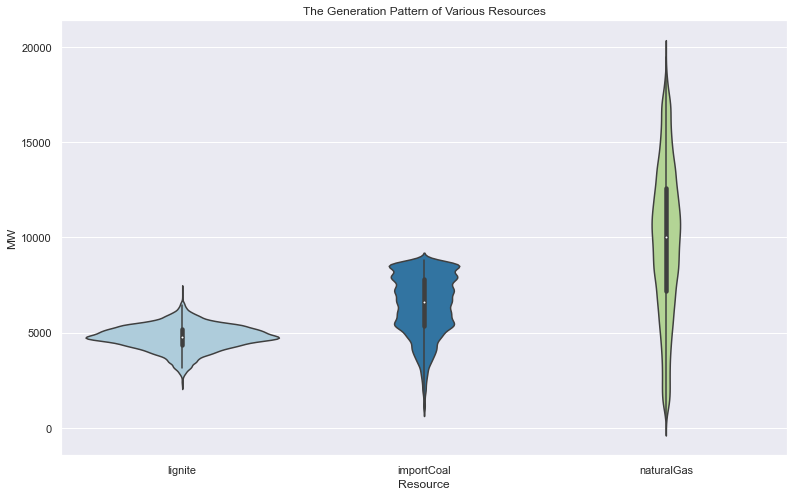

In [544]:
trx=tr[tr.year>2015]
cols=["lignite","importCoal","naturalGas"]
sns.violinplot(data=(trx[cols]))
xlabel("Resource")
ylabel("MW")
title("The Generation Pattern of Various Resources")

Text(0.5, 1.0, 'Imported Coal - Yearly Distributions')

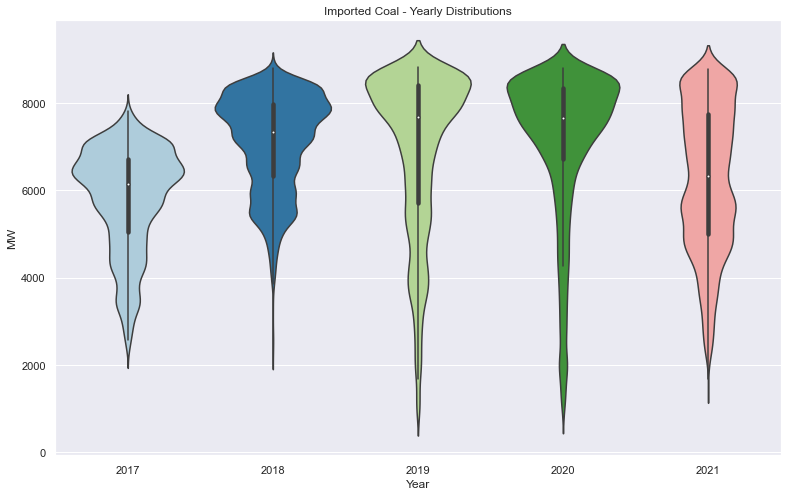

In [545]:
sns.set_palette("Paired")

tr2=pd.pivot_table(trx, values='importCoal', index=["month","day","hour"],columns=['year'],aggfunc=np.sum)
sns.violinplot(data=tr2[[2017,2018,2019,2020,2021]])
xlabel("Year")
ylabel("MW")
title("Imported Coal - Yearly Distributions")



Text(0.5, 1.0, 'Gas - Yearly Distributions')

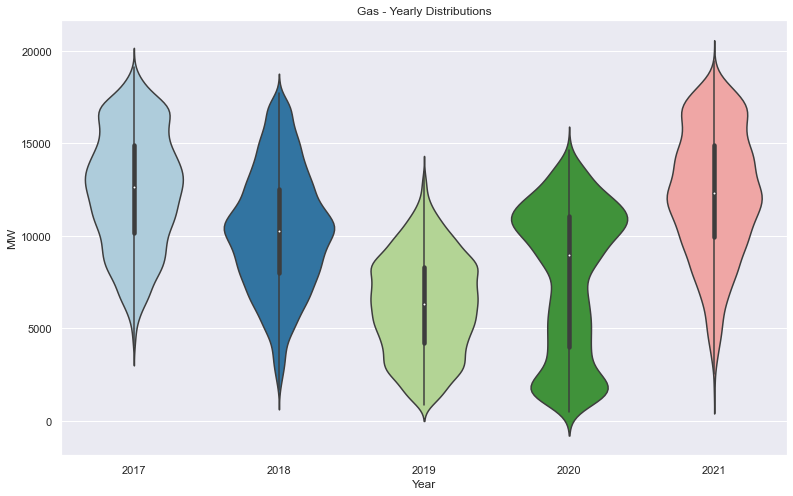

In [546]:
tr2=pd.pivot_table(trx, values='naturalGas', index=["month","day","hour"],columns=['year'],aggfunc=np.sum)
sns.violinplot(data=tr2[[2017,2018,2019,2020,2021]])
xlabel("Year")
ylabel("MW")
title("Gas - Yearly Distributions")

Text(0.5, 1.0, 'Big Hydro - Yearly Distributions')

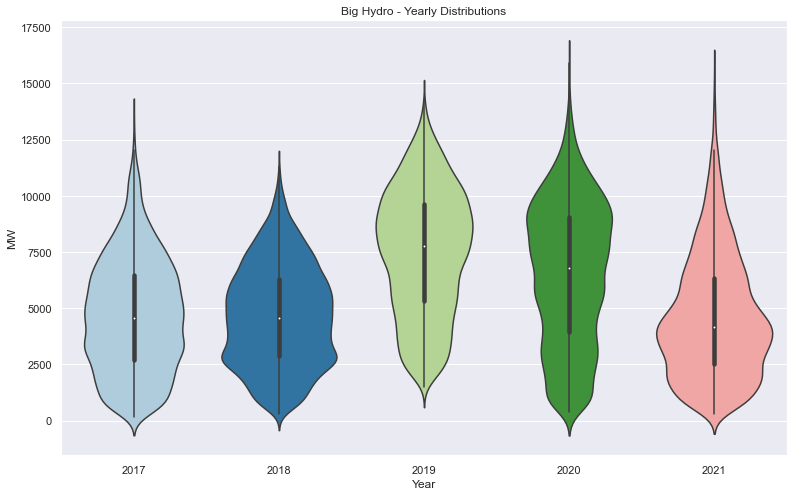

In [547]:
tr2=pd.pivot_table(trx, values='dammedHydro', index=["month","day","hour"],columns=['year'],aggfunc=np.sum)
sns.violinplot(data=tr2[[2017,2018,2019,2020,2021]])
xlabel("Year")
ylabel("MW")
title("Big Hydro - Yearly Distributions")

Text(0.5, 1.0, 'Big Hydro - Yearly Distributions')

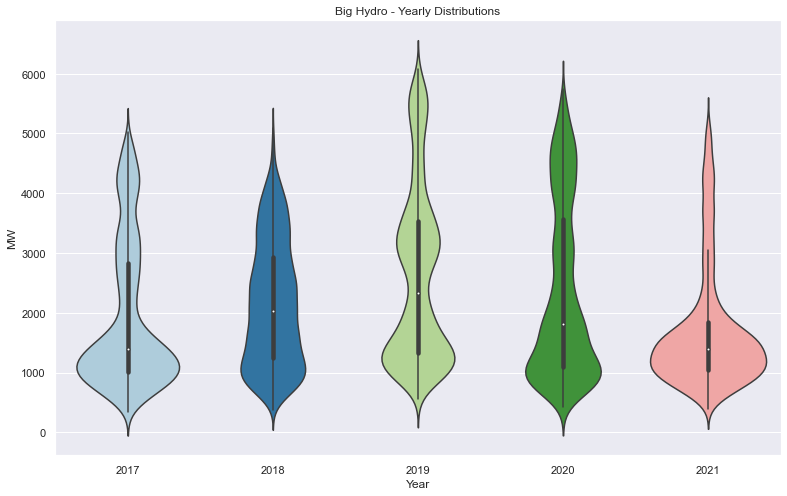

In [548]:
tr2=pd.pivot_table(trx, values='river', index=["month","day","hour"],columns=['year'],aggfunc=np.sum)
sns.violinplot(data=tr2[[2017,2018,2019,2020,2021]])
xlabel("Year")
ylabel("MW")
title("Big Hydro - Yearly Distributions")

Text(0.5, 1.0, 'Wind - Yearly Distributions')

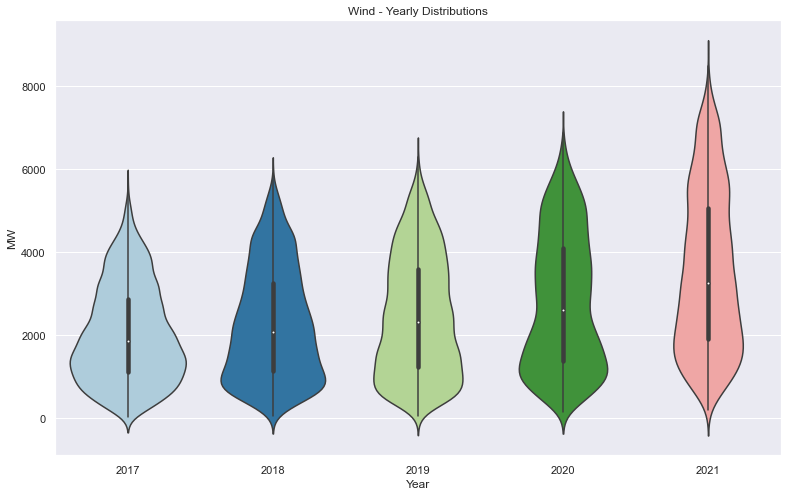

In [549]:
tr2=pd.pivot_table(trx, values='wind', index=["month","day","hour"],columns=['year'],aggfunc=np.sum)
sns.violinplot(data=tr2[[2017,2018,2019,2020,2021]])
xlabel("Year")
ylabel("MW")
title("Wind - Yearly Distributions")

Text(0.5, 1.0, 'Wind - Yearly Distributions')

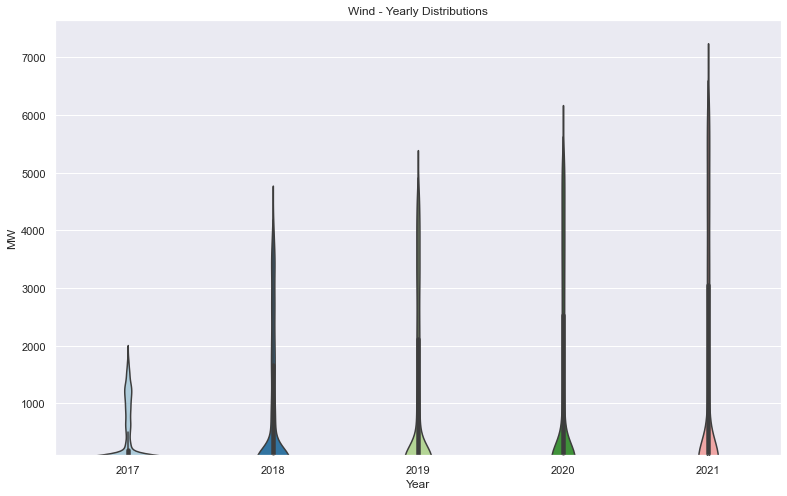

In [554]:
tr2=pd.pivot_table(trx, values='solar', index=["month","day","hour"],columns=['year'],aggfunc=np.sum)
sns.violinplot(data=tr2[[2017,2018,2019,2020,2021]])
ylim(100,None)
xlabel("Year")
ylabel("MW")
title("Wind - Yearly Distributions")

[(1000.0, 6200.0)]

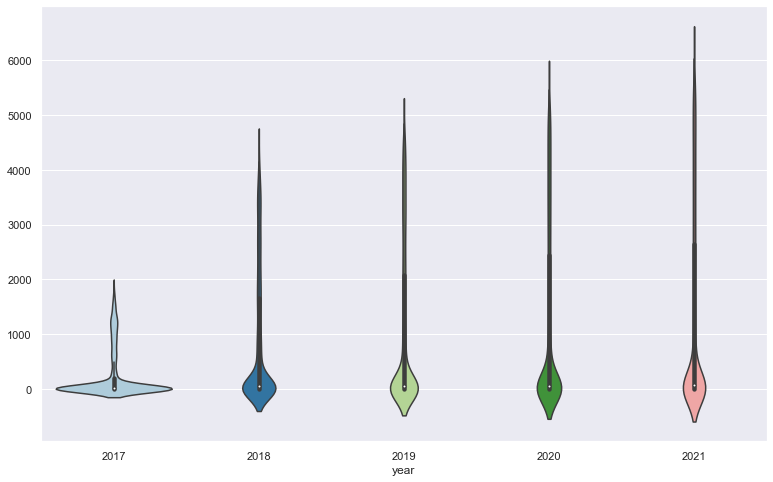

In [389]:
tr2=pd.pivot_table(trx, values='lsun', index=["month","day","hour"],columns=['year'],aggfunc=np.sum)
sns.violinplot(data=tr2[[2017,2018,2019,2020,2021]])
g.set(ylim=(1000, 6200))

<AxesSubplot:xlabel='year'>

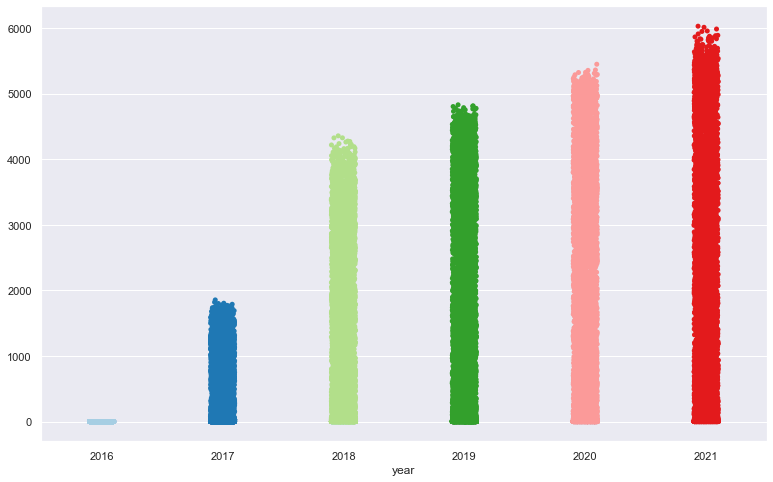

In [385]:
tr2=pd.pivot_table(trx, values='lsun', index=["month","day","hour"],columns=['year'],aggfunc=np.sum)
sns.stripplot(data=tr2)

In [394]:
df = pd.DataFrame(np.sort(tr2.values, axis=0),  columns=tr2.columns)

In [85]:
tr2=pd.pivot_table(tr,  index=["date"],columns=['year'],values=['gtotal'])
df = tr2.apply(lambda x: x.sort_values(ascending=False).values)

In [87]:
df=df.dropna()

In [92]:
df.columns

MultiIndex([('gtotal', 2015),
            ('gtotal', 2016),
            ('gtotal', 2017),
            ('gtotal', 2018),
            ('gtotal', 2019),
            ('gtotal', 2020),
            ('gtotal', 2021)],
           names=[None, 'year'])

(20000.0, 58682.466)

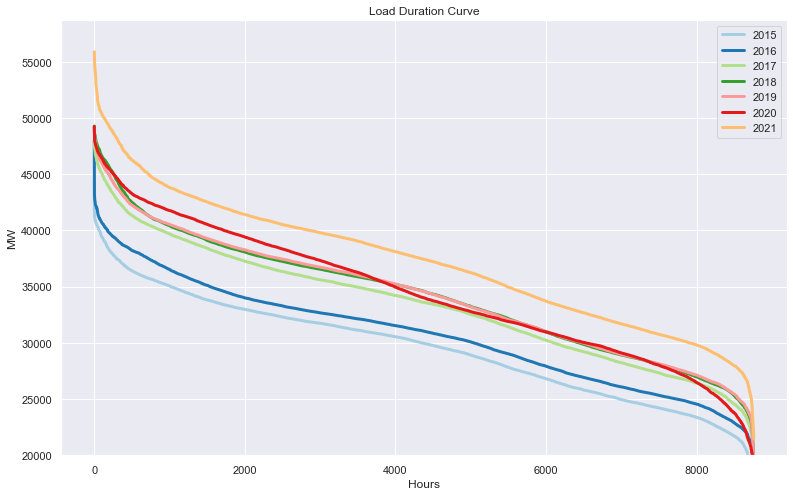

In [352]:
title("Load Duration Curve")
ylabel("MW")
xlabel("Hours")
for i in range(2015,2022):
 plt.plot(range(8759),df[('gtotal', i)], label=str(i), linewidth=3)
legend()
ylim(20000,None)
#xticks([])


(0.0, 200.0)

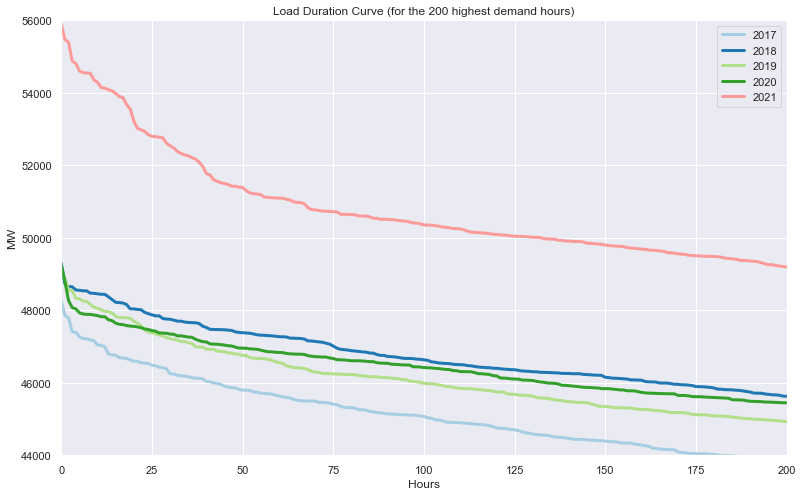

In [368]:
title("Load Duration Curve (for the 200 highest demand hours)")
ylabel("MW")
xlabel("Hours")
for i in range(2017,2022):
 plt.plot(range(8759),df[('gtotal', i)], label=str(i), linewidth=3)
legend()
ylim(44000,56000)
xlim(0,200)


#xticks([])



Text(0.5, 0, 'Normalized Generation')

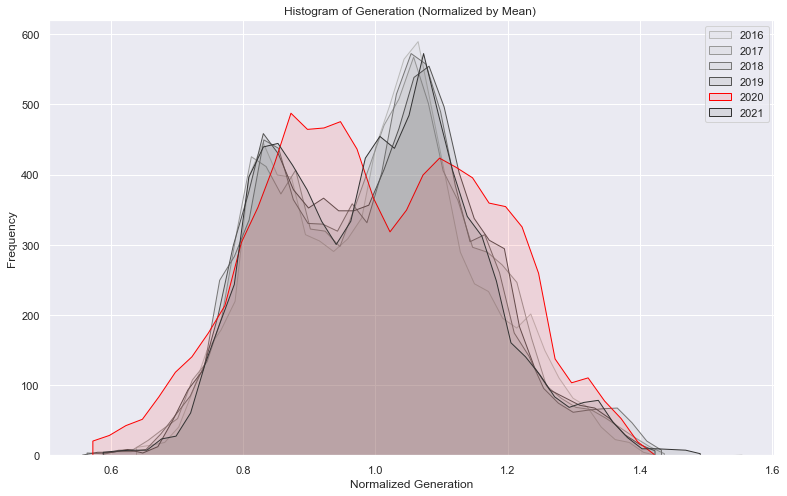

In [555]:
color=["#FFFFFF","#BBBBBB","#999999","#777777","#555555","red","#333333"]


for i in range(2016,2022):
 g=sns.histplot(df[('gtotal', i)]/df[('gtotal', i)].mean(),element="poly", alpha=0.1
            , kde=False, color=color[(i-2015)], label=str(i));         

g.legend()
title("Histogram of Generation (Normalized by Mean) ")
ylabel("Frequency")
xlabel("Normalized Generation")

In [123]:
tr.columns

Index(['date', 'fueloil', 'gasOil', 'blackCoal', 'lignite', 'geothermal',
       'naturalGas', 'river', 'dammedHydro', 'lng', 'biomass', 'naphta',
       'importCoal', 'asphaltiteCoal', 'wind', 'nucklear', 'sun',
       'importExport', 'total', 'ltotal', 'lwind', 'lbiogas', 'lcanalType',
       'lbiomass', 'lsun', 'lothers', 'day', 'month', 'year', 'hour', 'ym',
       'gtotal', 'solar', 'renws', 'renall', 'coal', 'coalgas'],
      dtype='object')

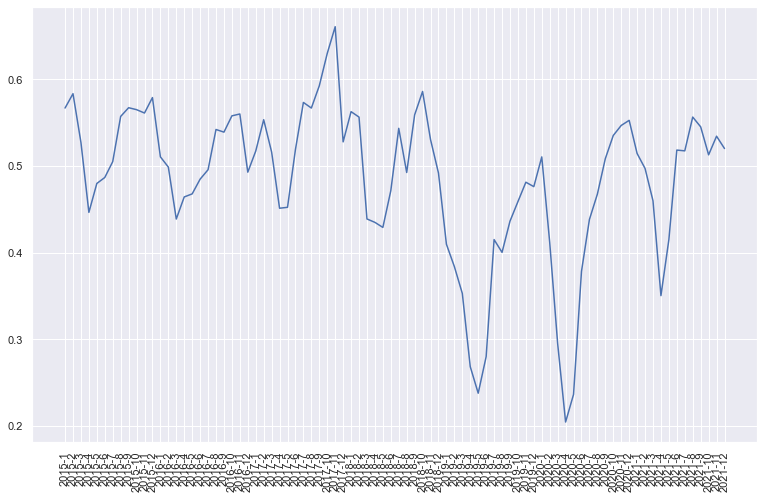

In [127]:
xticks(rotation=90)
plot(trm.ym,((trm.importCoal+trm.naturalGas)/trm.gtotal))


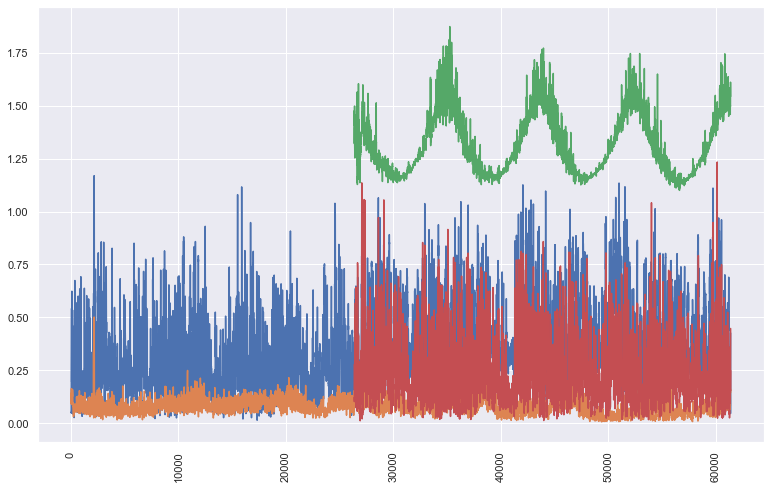

In [141]:
xticks(rotation=90)
#plot(trm.ym,trm.renall.rolling(24).std())
plot(tr.renws.rolling(24).std()/tr.renws.rolling(24).mean())
plot(tr.coalgas.rolling(24).std()/tr.coalgas.rolling(24).mean())
plot(tr.solar[-8760*4:].rolling(24).std()/tr.solar[-8760*4:].rolling(24).mean())
plot(tr.wind[-8760*4:].rolling(24).std()/tr.wind[-8760*4:].rolling(24).mean())

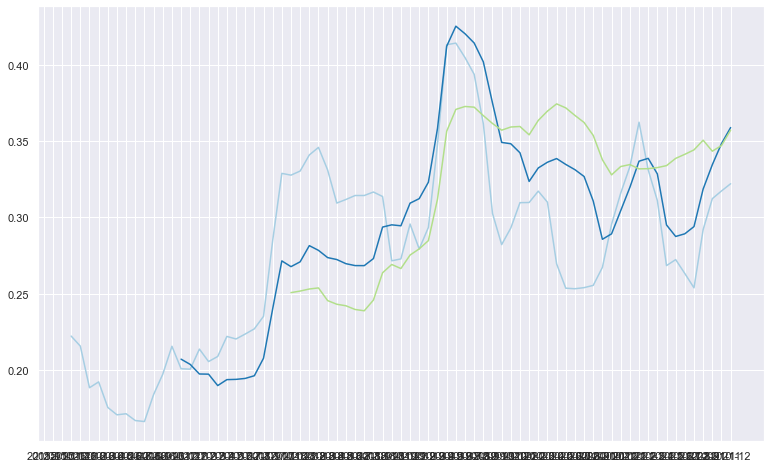

In [342]:
plot(trm.ym,trm.hydro.rolling(12).std()/trm.hydro.rolling(12).mean())
plot(trm.ym,trm.hydro.rolling(24).std()/trm.hydro.rolling(24).mean())
plot(trm.ym,trm.hydro.rolling(36).std()/trm.hydro.rolling(36).mean())


#plot(tr.date,trm.coalgas.rolling(24).std()/trm.coalgas.rolling(24).mean())

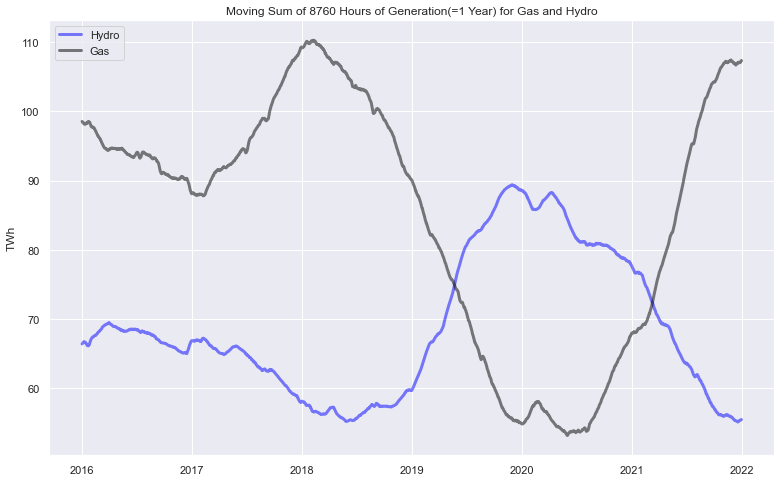

In [561]:
title("Moving Sum of 8760 Hours of Generation(=1 Year) for Gas and Hydro")
ylabel("TWh")
plot(tr.date, tr.hydro.rolling(8760).sum()/1e6, label="Hydro", color="blue",linewidth=3, alpha=0.5)
plot(tr.date, tr.naturalGas.rolling(8760).sum()/1e6, label="Gas", color="black",linewidth=3, alpha=0.5)
legend()

# Correlations with demand, solar and wind

In [604]:
solarcorr=tr["solar"].rolling(24).corr(tr[["coal","naturalGas","wind","hydro","gtotal"]])
windcorr=tr["wind"].rolling(24).corr(tr[["coal","naturalGas","solar","hydro","gtotal"]])
wscorr=tr["renws"].rolling(24).corr(tr[["coal","naturalGas","hydro","gtotal"]])
gtcorr=tr["gtotal"].rolling(24).corr(tr[["coal","naturalGas","hydro","renws"]])

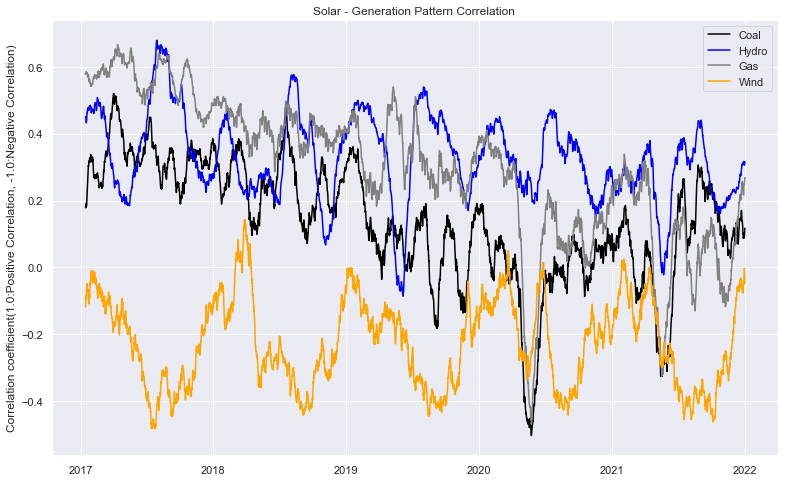

In [617]:
title("Solar - Generation Pattern Correlation ")
ylabel("Correlation coefficient(1.0:Positive Correlation, -1.0:Negative Correlation)")
plot(tr.date,solarcorr["coal"].rolling(24*30).mean(),color="black",label="Coal")
plot(tr.date,solarcorr["hydro"].rolling(24*30).mean(), color="blue",label="Hydro")
plot(tr.date,solarcorr["naturalGas"].rolling(24*30).mean(),color="gray",label="Gas")
plot(tr.date,solarcorr["wind"].rolling(24*30).mean(),color="orange",label="Wind")
legend()

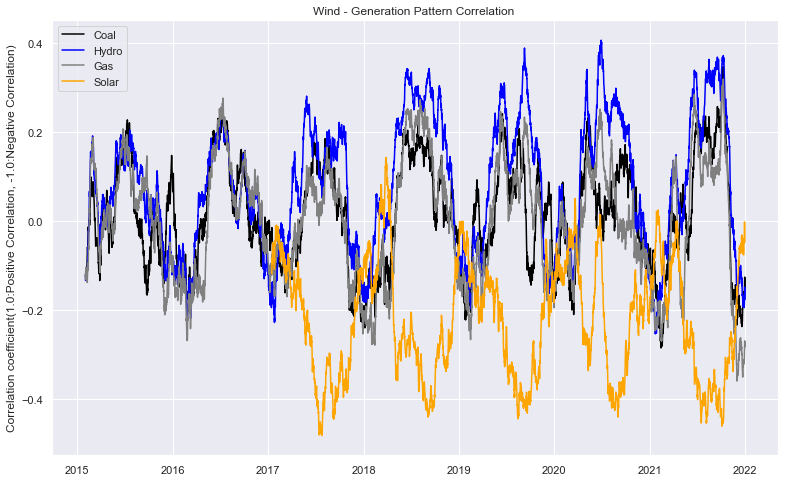

In [615]:
title("Wind - Generation Pattern Correlation ")
ylabel("Correlation coefficient(1.0:Positive Correlation, -1.0:Negative Correlation)")
plot(tr.date,windcorr["coal"].rolling(24*30).mean(),color="black",label="Coal")
plot(tr.date,windcorr["hydro"].rolling(24*30).mean(), color="blue",label="Hydro")
plot(tr.date,windcorr["naturalGas"].rolling(24*30).mean(),color="gray",label="Gas")
plot(tr.date,windcorr["solar"].rolling(24*30).mean(),color="orange",label="Solar")


legend()

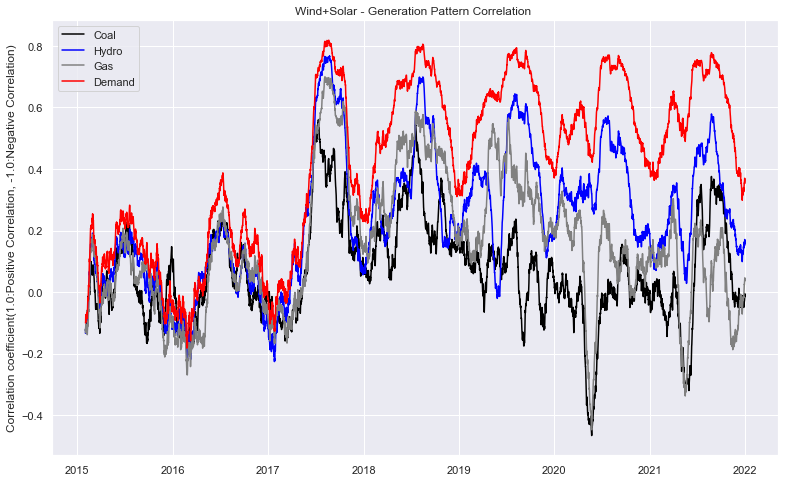

In [706]:
title("Wind+Solar - Generation Pattern Correlation ")
ylabel("Correlation coefficient(1.0:Positive Correlation, -1.0:Negative Correlation)")
plot(tr.date,wscorr["coal"].rolling(24*30).mean(),color="black",label="Coal")
plot(tr.date,wscorr["hydro"].rolling(24*30).mean(), color="blue",label="Hydro")
plot(tr.date,wscorr["naturalGas"].rolling(24*30).mean(),color="gray",label="Gas")
plot(tr.date,wscorr["gtotal"].rolling(24*30).mean(),color="red",label="Demand")


legend()

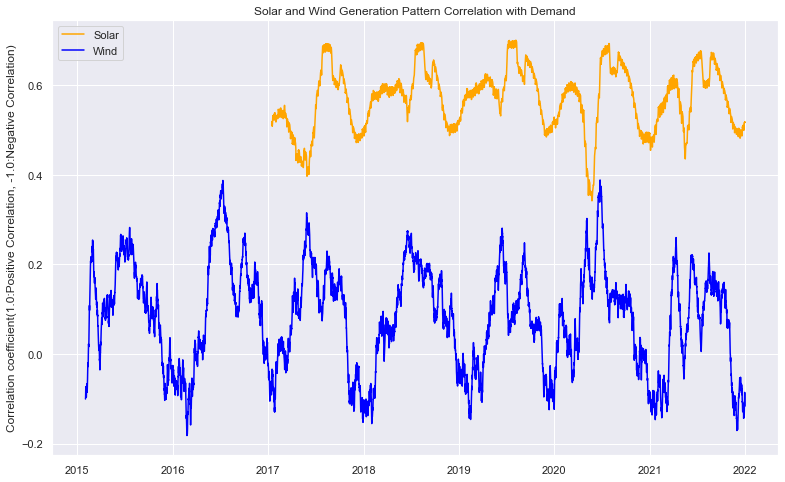

In [620]:
title("Solar and Wind Generation Pattern Correlation with Demand")
ylabel("Correlation coefficient(1.0:Positive Correlation, -1.0:Negative Correlation)")
plot(tr.date,solarcorr["gtotal"].rolling(24*30).mean(),color="orange",label="Solar")
plot(tr.date,windcorr["gtotal"].rolling(24*30).mean(),color="blue",label="Wind")
legend()

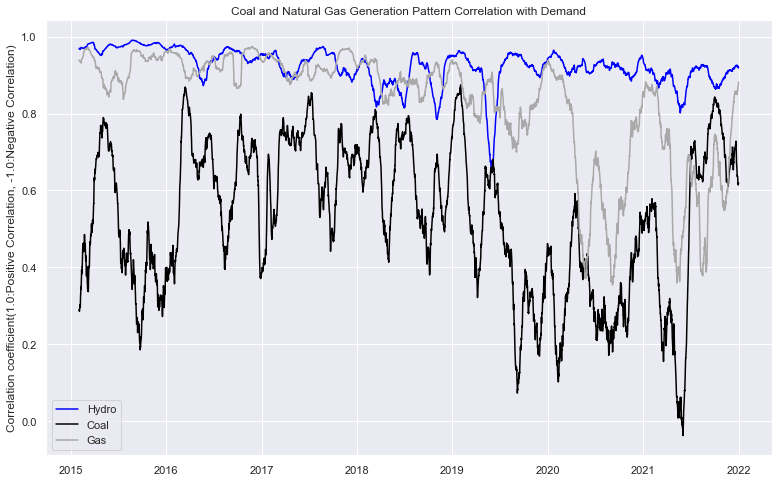

In [626]:
title("Coal and Natural Gas Generation Pattern Correlation with Demand")
ylabel("Correlation coefficient(1.0:Positive Correlation, -1.0:Negative Correlation)")
plot(tr.date,gtcorr["hydro"].rolling(24*30).mean(),color="blue",label="Hydro")
plot(tr.date,gtcorr["coal"].rolling(24*30).mean(),color="black",label="Coal")
plot(tr.date,gtcorr["naturalGas"].rolling(24*30).mean(),color="darkgray",label="Gas")
legend()